Roadmap  

The end objective is a machine learning model that can predict the poverty level of a household. However, before we get carried away with modeling, it's important to understand the problem and data. Also, we want to evaluate numerous models before choosing one as the "best" and after building a model, we want to investigate the predictions. Our roadmap is therefore as follows:

Understand the problem (we're almost there already)</br>  

Exploratory Data Analysis</br>  

Feature engineering to create a dataset for machine learning</br>  

Compare several baseline machine learning models</br>  

Try more complex machine learning models</br>  

Optimize the selected model</br>  

Investigate model predictions in context of problem</br>  

Draw conclusions and lay out next steps</br>  

The steps laid out above are iterative meaning that while we will go through them one at a time, we might go back to an earlier step and revisit some of our decisions. In general, data science is a non-linear pracice where we are constantly evaluating our past decisions and making improvements. In particular, feature engineering, modeling, and optimization are steps that we often repeat because we never know if we got them right the first time!

路線圖  
最終目標是一種可以預測家庭貧困水平的機器學習模型。但是，在開始進行建模之前，了解問題和數據很重要。此外，我們希望在選擇一個模型作為“最佳”模型之前評估眾多模型，並在構建模型之後要調查這些預測。因此，我們的路線圖如下：

理解問題（我們已經差不多了）</br>  
探索性數據分析</br>  
特徵工程以創建用於機器學習的數據集</br>  
比較幾種基準機器學習模型</br>  
嘗試更複雜的機器學習模型</br>  
優化所選模型</br>  
研究問題中的模型預測</br>  
得出結論並規劃下一步</br>  
上面列出的步驟是迭代性的，這意味著儘管我們一次要經歷一個步驟，但我們可能會返回到較早的步驟並重新審視一些決策。通常，數據科學是一種非線性的實踐，我們不斷評估過去的決策並進行改進。特別是，要素工程，建模和優化是我們經常重複的步驟，因為我們不知道我們是否第一次就正確地將它們正確！

Getting Started  

We have a pretty good grasp of the problem, so we'll move into the Exploratory Data Analysis (EDA) and feature engineering. For the EDA we'll examine any interesting anomalies, trends, correlations, or patterns that can be used for feature engineering and for modeling. We'll make sure to investigate our data both quantitatively (with statistics) and visually (with figures).  

Once we have a good grasp of the data and any potentially useful relationships, we can do some feature engineering (the most important part of the machine learning pipeline) and establish a baseline model. This won't get us to the top of the leaderboard, but it will provide a strong foundation to build on!

With all that info in mind (don't worry if you haven't got all the details), let's get started!

Imports  
We'll use a familiar stack of data science libraries: Pandas, numpy, matplotlib, seaborn, and eventually sklearn for modeling.

入門  
我們已經很好地解決了這個問題，因此我們將進入探索性數據分析（EDA）和功能工程。 對於EDA，我們將檢查可用於特徵工程和建模的任何有趣的異常，趨勢，相關性或模式。 我們將確保定量（通過統計）和視覺（通過數字）調查我們的數據。

一旦我們掌握了數據以及任何可能有用的關係，就可以進行一些特徵工程（機器學習管道中最重要的部分）並建立基線模型。 這不會使我們登上排行榜的首位，但是它將為我們提供堅實的基礎！

考慮到所有這些信息（如果您沒有所有的細節，請不要擔心），讓我們開始吧！

匯入  
我們將使用熟悉的數據科學庫堆棧：Pandas，numpy，matplotlib，seaborn以及最終的sklearn進行建模。

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


使用.head()可以顯示5筆資料（預設是5筆）也可以自訂，只需要在括弧內加上要的數字：  


That gives us a look at all of the columns which don't appear to be in any order. To get a quick overview of the data we use df.info().  
這樣一來，我們便可以查看似乎沒有任何順序的所有列。 為了快速瀏覽數據，我們使用df.info（）。

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.2+ MB


This tells us there are 130 integer columns, 8 float (numeric) columns, and 5 object columns. The integer columns probably represent Boolean variables (that take on either 0 or 1) or ordinal variables with discrete ordered values. The object columns might pose an issue because they cannot be fed directly into a machine learning model.

Let's glance at the test data which has many more rows (individuals) than the train. It does have one fewer column because there's no Target!  
這告訴我們有130個整數列，8個浮點（數字）列和5個對象列。 整數列可能表示布爾變量（採用0或1）或具有離散有序值的序數變量。 對象列可能會引起問題，因為它們無法直接輸入到機器學習模型中。

讓我們看一下測試數據，該數據比火車具有更多的行（個人）。 它的確少了一列，因為沒有目標！

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.4+ MB


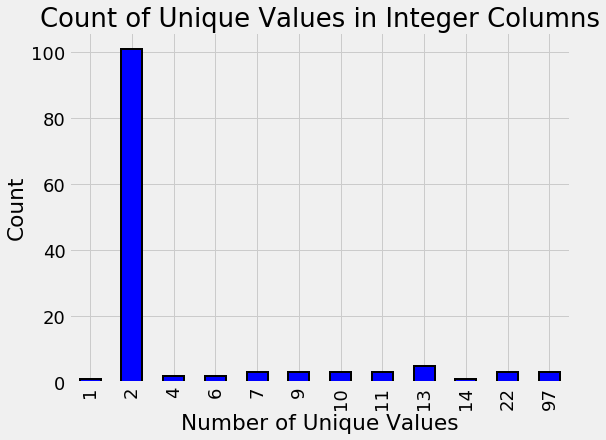

In [5]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

The columns with only 2 unique values represent Booleans (0 or 1). In a lot of cases, this boolean information is already on a household level. For example, the refrig column says whether or not the household has a refrigerator. When it comes time to make features from the Boolean columns that are on the household level, we will not need to aggregate these. However, the Boolean columns that are on the individual level will need to be aggregated.  

Float Columns  
Another column type is floats which represent continuous variables. We can make a quick distribution plot to show the distribution of all float columns. We'll use an OrderedDict to map the poverty levels to colors because this keeps the keys and values in the same order as we specify (unlike a regular Python dictionary).  

The following graphs shows the distributions of the float columns colored by the value of the Target. With these plots, we can see if there is a significant difference in the variable distribution depending on the household poverty level.

===============================================================  

只有2個唯一值的列表示布爾值（0或1）。在許多情況下，此佈爾信息已處於家庭級別。例如，製冷欄顯示該家庭是否有冰箱。當需要從住戶級別的布爾列製作要素時，我們將不需要匯總這些要素。但是，單個級別的布爾列將需要聚合。

浮點數欄位  
另一列類型是浮點數，代表連續變量。我們可以做一個快速分佈圖來顯示所有浮點數列的分佈。我們將使用OrderedDict將貧困程度映射到顏色，因為這會使鍵和值保持與我們指定的順序相同（不同於常規的Python詞典）。

下圖顯示了用Target值著色的float列的分佈。通過這些圖，我們可以看到取決於家庭貧困水平的變量分佈是否存在顯著差異。

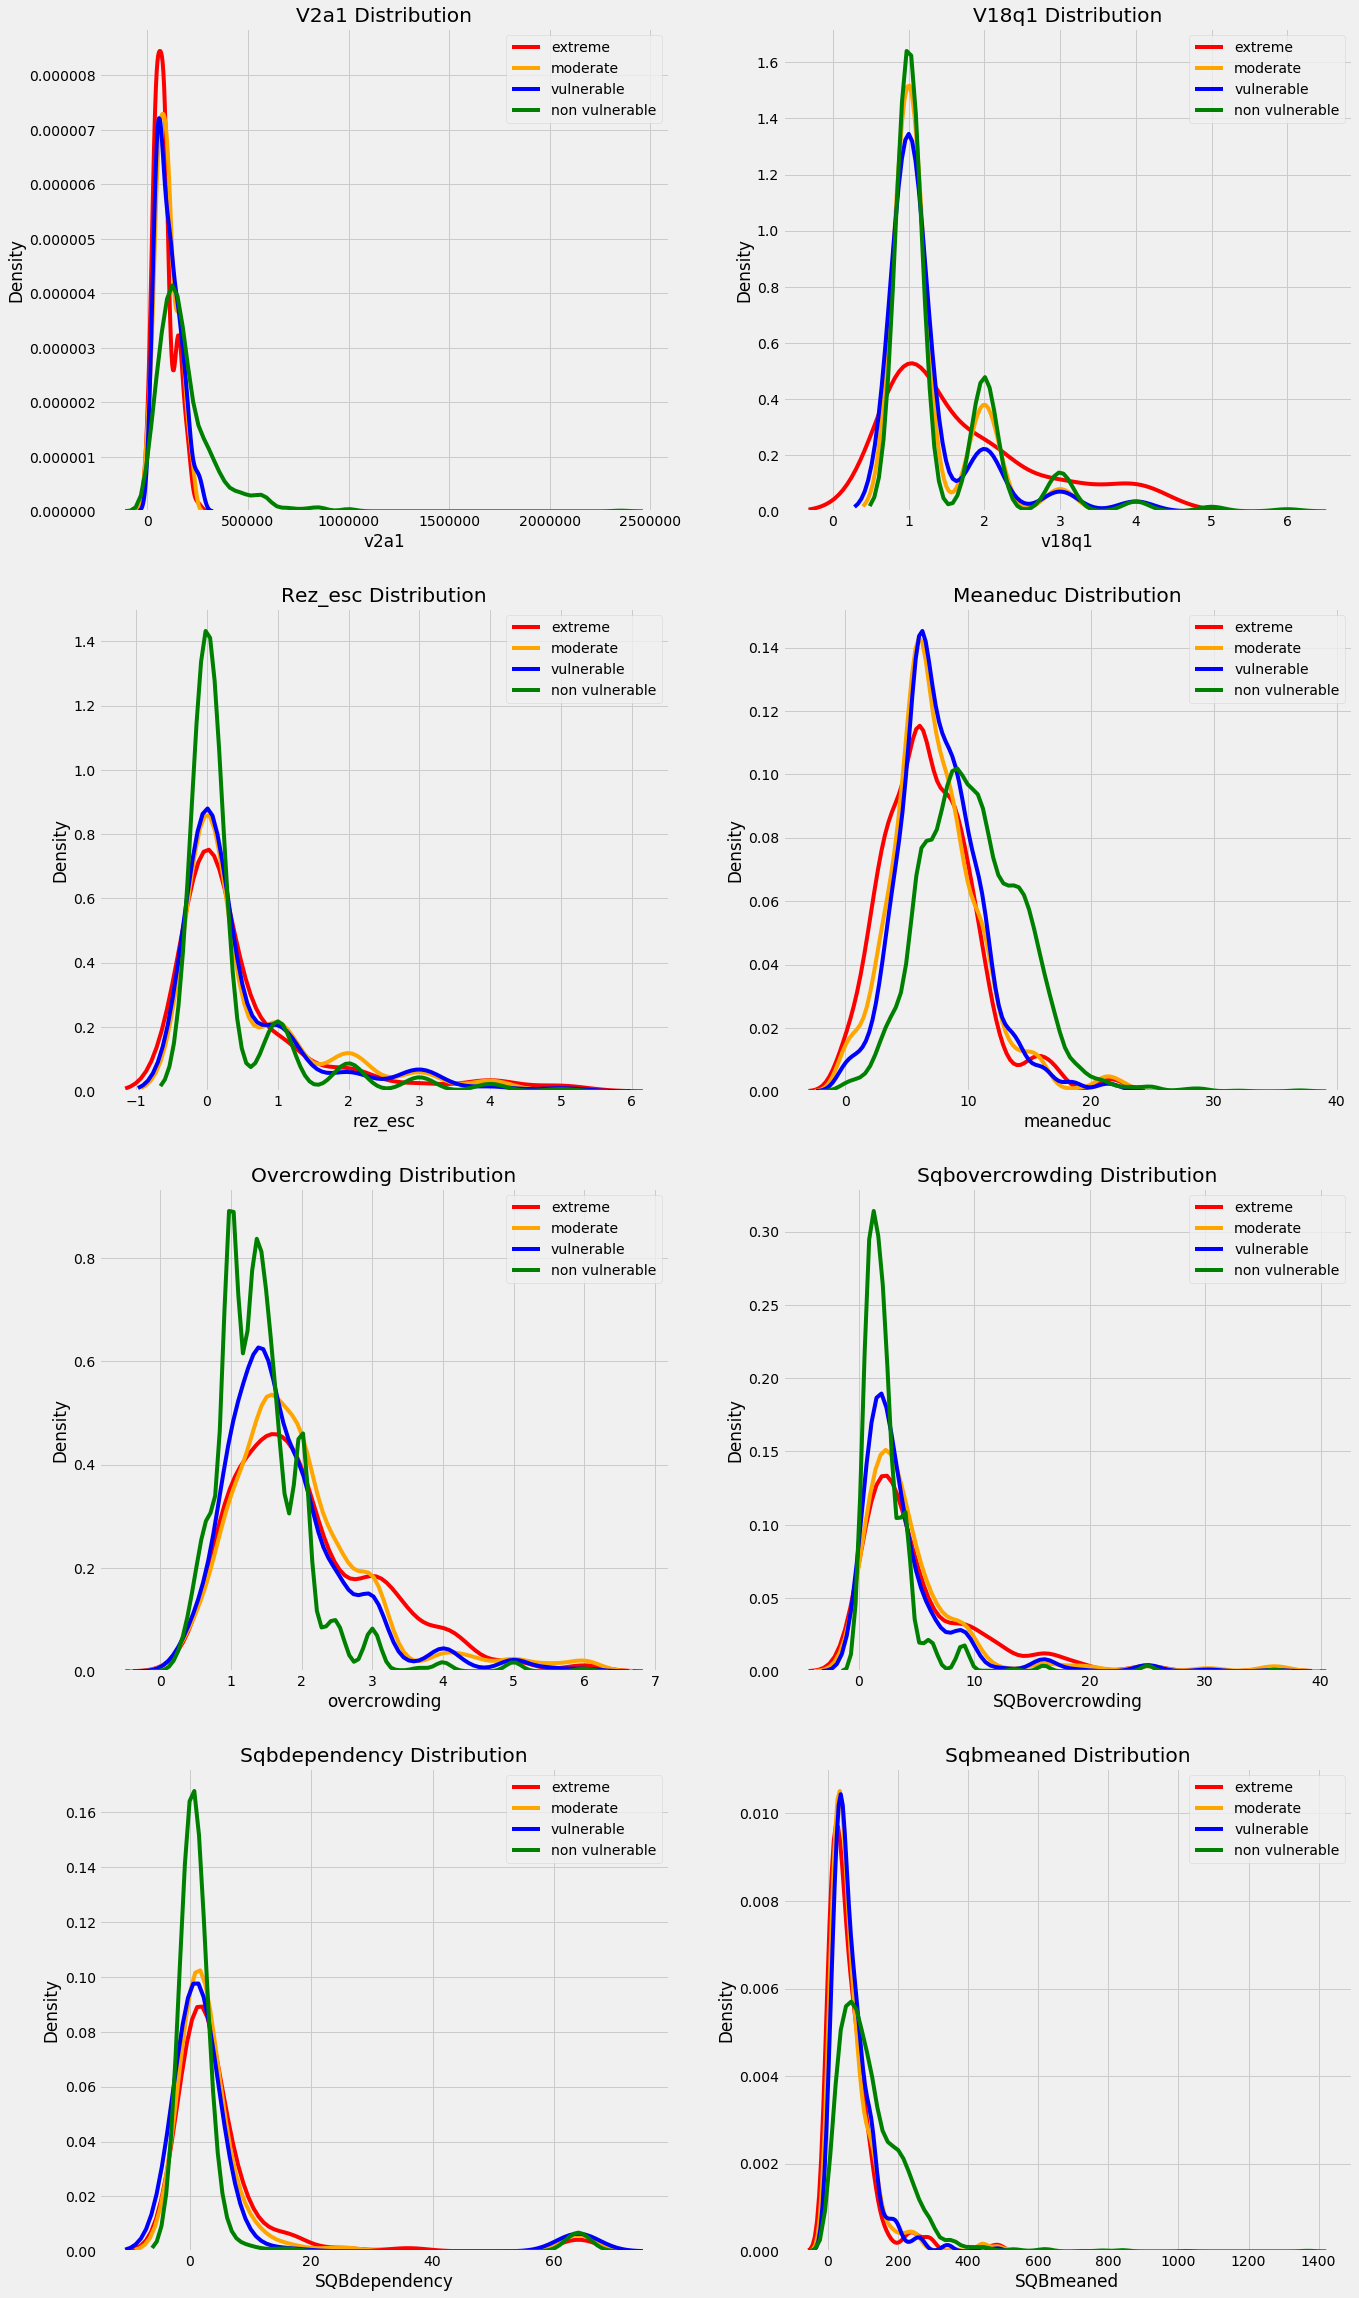

In [6]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
#     設定分割窗口數量
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
#         抓取colors中的等級和顏色
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
#                     .dropna()刪除na
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

Later on we'll calculate correlations between the variables and the Target to gauge the relationships between the features, but these plots can already give us a sense of which variables may be most "relevant" to a model. For example, the meaneduc, representing the average education of the adults in the household appears to be related to the poverty level: a higher average adult education leads to higher values of the target which are less severe levels of poverty. The theme of the importance of education is one we will come back to again and again in this notebook!  

稍後，我們將計算變量與目標之間的相關性，以衡量要素之間的關係，但是這些圖已經可以使我們了解哪些變量可能與模型最“相關”。 例如，代表家庭中成年人平均教育水平的meanduc似乎與貧困程度有關：成年人平均教育水平越高，目標值就越高，貧困程度就越輕。 教育重要性的主題是我們將在本筆記本中一次又一次地回到主題！

In [7]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


The Id and idhogar object types make sense because these are identifying variables. However, the other columns seem to be a mix of strings and numbers which we'll need to address before doing any machine learning. According to the documentation for these columns:

dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
These explanations clear up the issue. For these three variables, "yes" = 1 and "no" = 0. We can correct the variables using a mapping and convert to floats.  
Id和idhogar對像類型很有意義，因為它們是標識變量。 但是，其他列似乎是字符串和數字的混合，我們在進行任何機器學習之前都需要解決這些問題。 根據這些列的文檔：

dependency：依存率，計算得出=（19歲以下或64歲以上家庭成員數）/（19到64歲之間的家庭成員數）  
edjefe：基於escolari（受教育年限），戶主和性別的相互作用的男性戶主的受教育年限，是= 1，否= 0  
edjefa：女戶主的受教育年限，基於escolari（受教育年限），戶主和性別的相互作用，是= 1，否= 0  
這些解釋可以解決問題。 對於這三個變量，“ yes” = 1和“ no” =0。我們可以使用映射更正變量並將其轉換為float。

In [8]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


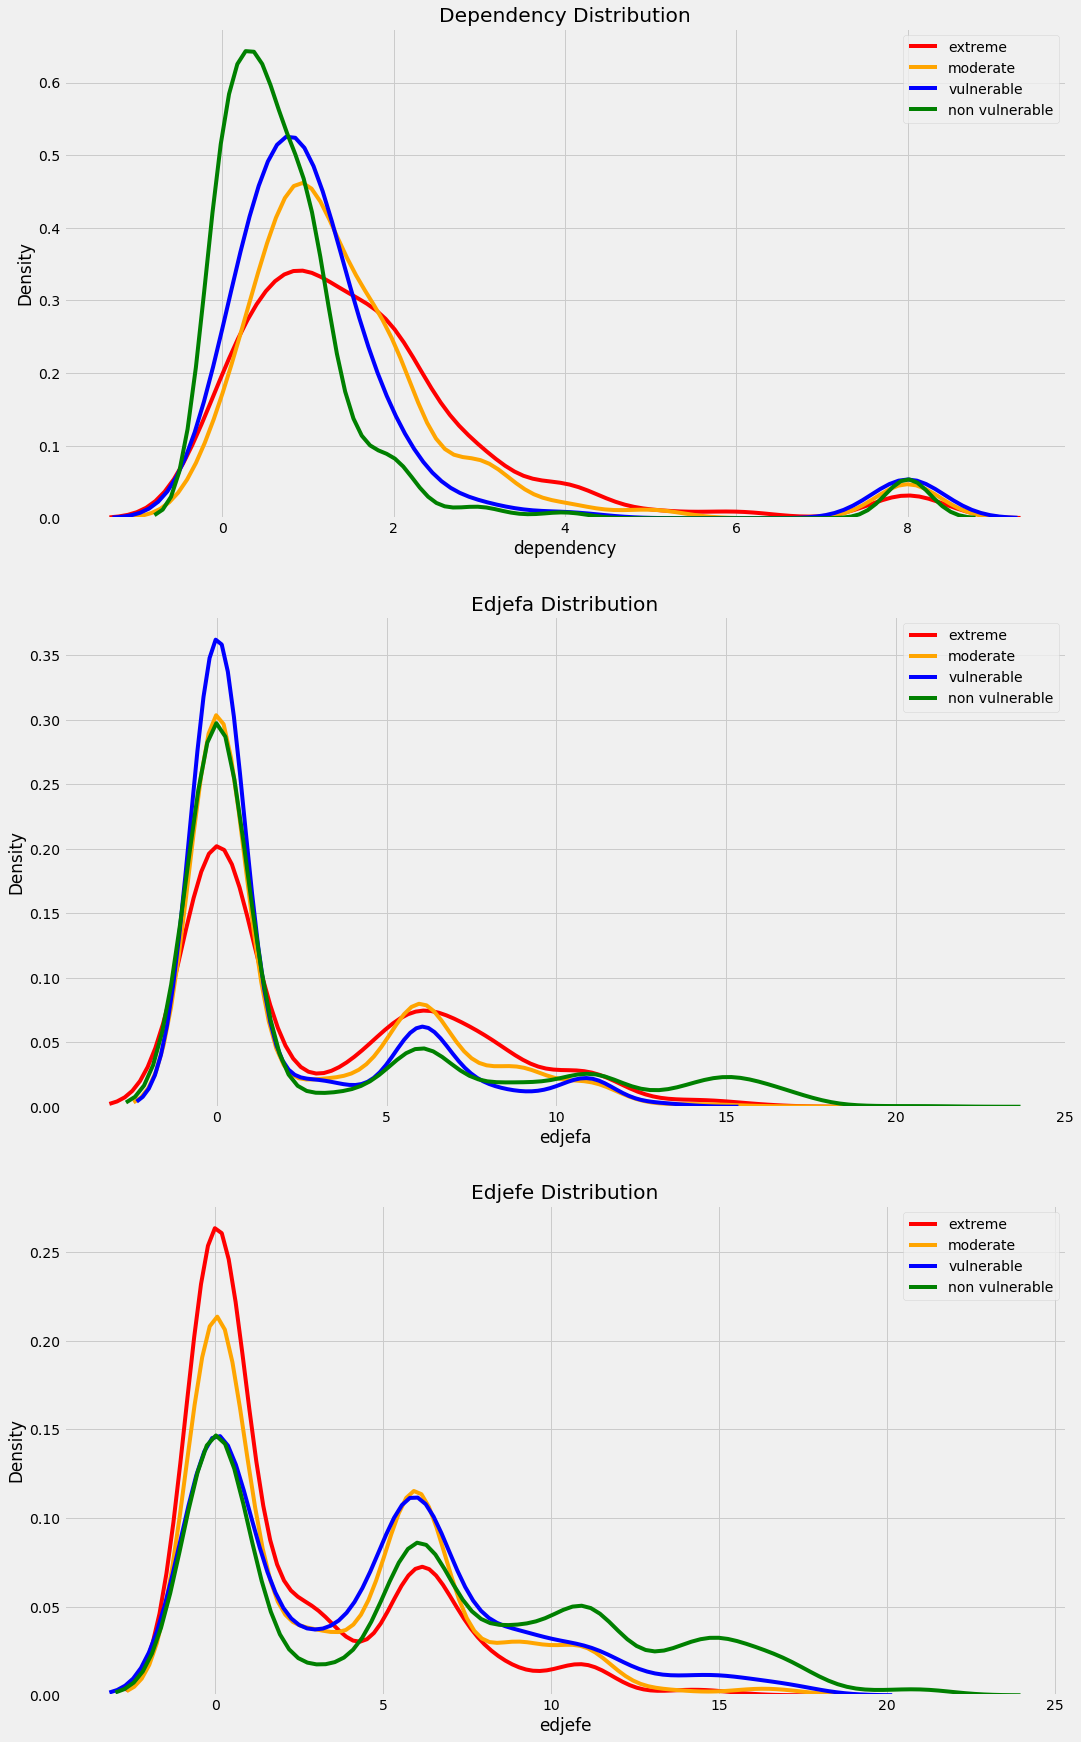

In [9]:
plt.figure(figsize = (16, 12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

These variables are now correctly represented as numbers and can be fed into a machine learning model.  

To make operations like that above a little easier, we'll join together the training and testing dataframes. This is important once we start feature engineering because we want to apply the same operations to both dataframes so we end up with the same features. Later we can separate out the sets based on the Target.  
這些變量現在可以正確地表示為數字，並且可以輸入到機器學習模型中。  

為了使上述操作更加簡單，我們將訓練和測試數據框結合在一起。 一旦開始要素工程，這一點很重要，因為我們希望對兩個數據框應用相同的操作，因此最終獲得相同的要素。 稍後我們可以根據目標分離出集合。  

In [10]:
# Add null Target column to test
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

Exploring Label Distribution  
Next, we can get an idea of how imbalanced the problem is by looking at the distribution of labels. There are four possible integer levels, indicating four different levels of poverty. To look at the correct labels, we'll subset only to the columns where parentesco1 == 1 because this is the head of household, the correct label for each household.  

The bar plot below shows the distribution of training labels (since there are no testing labels).  
探索標籤分配  
接下來，我們可以通過查看標籤的分佈來了解問題的不平衡程度。 有四個可能的整數級別，表示四個不同的貧困級別。 為了查看正確的標籤，我們僅將其子集作為parentesco1 == 1的列，因為這是戶主，每個家庭的正確標籤。  

下面的條形圖顯示了訓練標籤的分佈（因為沒有測試標籤）。  

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

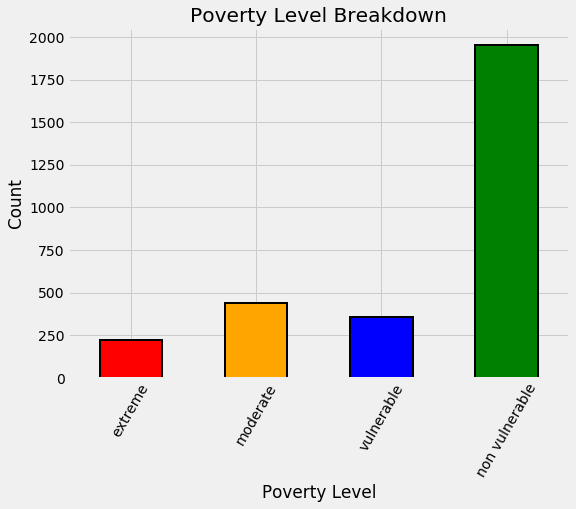

In [11]:
# Heads of household
heads = data.loc[data['parentesco1'] == 1].copy()

# Labels for training
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');

label_counts

We are dealing with an imbalanced class problem (which makes it intriguing why the contest organizers choose the macro F1 score as the metric instead of weighted F1!). There are many more households that classify as non vulnerable than in any other category. The extreme poverty class is the smallest (I guess this should make us optimistic!).  

One problem with imbalanced classification problems is that the machine learning model can have a difficult time predicting the minority classes because it sees far less examples. Think about this in human terms: if we are classifiying poverty and we see far more cases of no poverty than extreme poverty, it will make it more difficult for us to identify the high poverty households because of less exposure. One potential method to address class imbalanceds is through oversampling (which is covered in more advanced notebooks).  

我們正在處理班級不平衡的問題（這使比賽組織者為什麼選擇宏F1得分而不是加權F1成為指標很有趣！）。 與其他類別相比，被歸類為非脆弱家庭的家庭要多得多。 極端貧困階層人數最少（我想這應該使我們感到樂觀！）。  

分類不平衡問題的一個問題是，機器學習模型很難預測少數派類別，因為它看到的示例要少得多。 用人類的角度來思考：如果我們正在對貧困進行分類，並且我們看到的沒有貧困的案例多於赤貧，那麼由於暴露的機會較少，我們將很難識別高貧困家庭。 解決類不平衡的一種潛在方法是通過過度採樣（在更高級的筆記本電腦中已涵蓋）。  

Addressing Wrong Labels  
As with any realistic dataset, the Costa Rican Poverty data has some issues. Typically, 80% of a data science project will be spent cleaning data and fixing anomalies/errors. These can be either human entry errors, measurement errors, or sometimes just extreme values that are correct but stand out. For this problem, some of the labels are not correct because individuals in the same household have a different poverty level. We're not told why this may be the case, but we are told to use the head of household as the true label.  

That information makes our job much easier, but in a real-world problem, we would have to figure out the reason Why the labels are wrong and how to address the issue on our own. This section fixes the issue with the labels although it is not strictly necessary: I kept it in the notebook just to show how we may deal with this issue.  

Identify Errors  
First we need to find the errors before we can correct them. To find the households with different labels for family members, we can group the data by the household and then check if there is only one unique value of the Target.  
解決標籤錯誤  
與任何現實數據集一樣，哥斯達黎加貧困數據也存在一些問題。通常，數據科學項目的80％將花費在清理數據和修復異常/錯誤上。這些可能是人為輸入錯誤，測量錯誤，有時甚至是正確但突出的極端值。對於此問題，某些標籤不正確，因為同一家庭中的個人的貧困水平不同。我們沒有被告知為什麼會這樣，但是被告知要使用戶主作為真實的標籤。  

這些信息使我們的工作變得容易得多，但是在實際問題中，我們將不得不弄清楚標籤錯誤的原因以及如何獨自解決問題。本節使用標籤解決了該問題，儘管並非絕對必要：我將其保存在筆記本中只是為了說明我們如何處理此問題。  

識別錯誤  
首先，我們需要先找到錯誤，然後才能進行糾正。要查找帶有不同標籤的家庭成員，我們可以按家庭對數據進行分組，然後檢查目標是否只有一個唯一值。  

In [12]:
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [13]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


The organizers tell us that the correct label is that for the head of household, where parentesco1 == 1. For this household, the correct label is 3 for all members. We can correct this (as shown later) by reassigning all the individuals in this household the correct poverty level. In the real-world, you might have to make the tough decision of how to address the problem by yourself (or with the help of your team).  

Families without Heads of Household  
We can correct all the label discrepancies by assigning the individuals in the same household the label of the head of household. But wait, you may ask: "What if there are households without a head of household? And what if the members of those households have differing values of the label?"  

Well, since you asked, let's investigate exactly that question!  

組織者告訴我們，正確的標籤是針對戶主的標籤，其中parentesco1 ==1。對於這個家庭，所有成員的正確標籤為3。 我們可以通過為該家庭中的所有個人重新分配正確的貧困水平來糾正此問題（如下所示）。 在現實世界中，您可能必須做出艱難的決定，即如何親自（或在團隊的幫助下）解決問題。  

沒有戶主的家庭  
通過為同一家庭中的個人分配戶主的標籤，我們可以糾正所有標籤差異。 但是，等等，您可能會問：“如果有沒有戶主的家庭呢？如果這些家庭的成員的標籤值不同怎麼辦？”  

好吧，既然您問過了，就讓我們確切地調查這個問題吧！  

In [14]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [15]:
# Find households without a head and where labels are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


Well that's a relief! This means that we don't have to worry about a household both where there is no head AND the members have different values of the label! For this problem, according to the organizers, if a household does not have a head, then there is no true label. Therefore, we actually won't use any of the households without a head for training Nonetheless, it's still a good exercise to go through this process of investigating the data! 

好吧，這很輕鬆！ 這意味著我們不必擔心沒有頭且成員的標籤值不同的家庭！ 對於組織者來說，對於這個問題，如果一個家庭沒有頭，那麼就沒有真正的標籤。 因此，實際上，我們將不會動用任何一個沒有頭腦的家庭來進行培訓。儘管如此，完成調查數據的過程仍然是一個很好的練習！

Correct Errors  
Now we can correct labels for the households that do have a head AND the members have different poverty levels.  
更正錯誤  
現在，我們可以為確實有戶主且成員的貧困水平不同的家庭更正標籤。  

In [16]:
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


Since we are only going to use the heads of household for the labels, this step is not completely necessary but it shows a workflow for correcting data errors like you may encounter in real life. Don't consider it extra work, just practice for your career!  


由於我們將只使用戶主的標籤，因此這一步驟不是完全必要的，但它顯示了糾正數據錯誤的工作流程，就像您在現實生活中可能遇到的那樣。 不要認為這是多餘的工作，而只是為了自己的職業而練習！

Missing Variables  
One of the most important steps of exploratory data analysis is finding missing values in the data and determining how to handle them. Missing values have to be filled in before we use a machine learning model and we need to think of the best strategy for filling them in based on the feature: this is where we'll have to start digging into the data definitions.  

First we can look at the percentage of missing values in each column.  

缺少變量  
探索性數據分析的最重要步驟之一是查找數據中的缺失值並確定如何處理它們。 在使用機器學習模型之前，必須填充缺失的值，並且我們需要根據該功能來考慮填充這些值的最佳策略：在這裡，我們必須開始研究數據定義。  

首先，我們可以查看每列中缺失值的百分比。  

In [17]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


We don't have to worry about the Target becuase we made that NaN for the test data. However, we do need to address the other 3 columns with a high percentage of missing values.  

v18q1: Number of tablets  

Let's start with v18q1 which indicates the number of tablets owned by a family. We can look at the value counts of this variable. Since this is a household variable, it only makes sense to look at it on a household level, so we'll only select the rows for the head of household.  

Function to Plot Value Counts  
Since we might want to plot value counts for different columns, we can write a simple function that will do it for us!  


我們不必擔心Target，因為我們將NaN用作測試數據。 但是，我們確實需要解決其他三列缺失值很高的問題。  

v18q1：平板電腦數量  

讓我們從v18q1開始，它指示一個家庭擁有的平板電腦數量。 我們可以看一下該變量的值計數。 由於這是一個家庭變量，因此僅在家庭級別上看才有意義，因此我們將僅選擇戶主的行。  

繪製值計數的函數  
由於我們可能想繪製不同列的值計數，因此我們可以編寫一個簡單的函數來為我們做！  

In [18]:
def plot_value_counts(df, col, heads_only = False):
    """Plot value counts of a column, optionally with only the heads of a household"""
    # Select heads of household
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
        
    plt.figure(figsize = (8, 6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                 edgecolor = 'k',
                                                 linewidth = 2)
    plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
    plt.show();

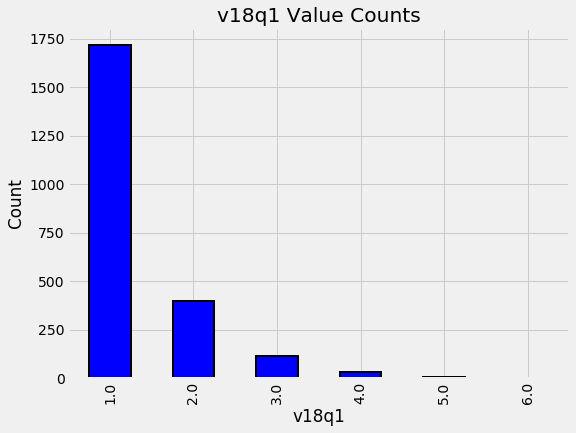

In [19]:
plot_value_counts(heads, 'v18q1')

It looks like the most common number of tablets to own is 1 if we go only by the data that is present. However, we also need to think about the data that is missing. In this case, it could be that families with a nan in this category just do not own a tablet! If we look at the data definitions, we see that v18q indicates whether or not a family owns a tablet. We should investigate this column combined with the number of tablets to see if our hypothesis holds.  

We can groupby the value of v18q (which is 1 for owns a tablet and 0 for does not) and then calculate the number of null values for v18q1. This will tell us if the null values represent that the family does not own a tablet.  

如果僅按照現有數據進行分析，看起來最常見的平板電腦數量是1。 但是，我們還需要考慮丟失的數據。 在這種情況下，可能是這個類別中有nan的家庭沒有平板電腦！ 如果看一下數據定義，就會看到v18q指示一個家庭是否擁有一台平板電腦。 我們應該結合列數來研究此列，以了解我們的假設是否成立。

我們可以對v18q的值進行分組（如果擁有平板電腦，則為1，否則為0），然後計算v18q1的空值數量。 這將告訴我們空值是否表示該家庭沒有平板電腦。

In [20]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

Well, that solves the issue! Every family that has nan for v18q1 does not own a tablet. Therefore, we can fill in this missing value with zero.  
好了，解決了這個問題！ 每個擁有nan v18q1的家庭都不擁有平板電腦。 因此，我們可以用零填充此缺失值。  

In [21]:
data['v18q1'] = data['v18q1'].fillna(0)

v2a1: Monthly rent payment  

The next missing column is v2a1 which represents the montly rent payment.  

In addition to looking at the missing values of the monthly rent payment, it will be interesting to also look at the distribution of tipovivi_, the columns showing the ownership/renting status of the home. For this plot, we show the ownership status of those homes with a nan for the monthyl rent payment.  

v2a1：每月租金  

下一個缺少的列是v2a1，它代表每月的租金。  

除了查看每月租金支付的缺失值外，還要查看tipovivi_的分佈（這些列顯示房屋的所有權/租賃狀態）會很有趣。 對於此圖，我們顯示了那些帶有月租的nan的房屋的所有權狀態。  

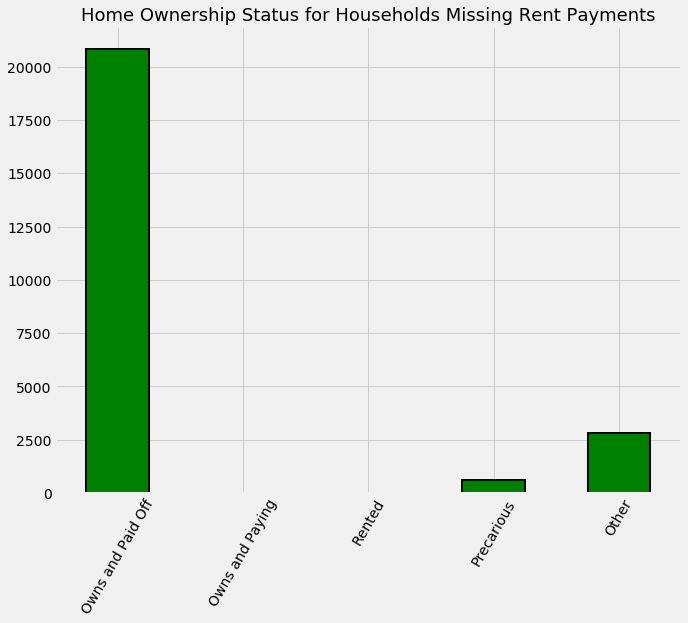

In [22]:
# Variables indicating home ownership
own_variables = [x for x in data if x.startswith('tipo')]


# Plot of the home ownership variables for home missing rent payments
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'green',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

The meaning of the home ownership variables is below:  

tipovivi1, =1 own and fully paid house  
tipovivi2, "=1 own,  paying in installments"  
tipovivi3, =1 rented  
tipovivi4, =1 precarious  
tipovivi5, "=1 other(assigned,  borrowed)"  

We've solved the issue! Well, mostly: the households that do not have a monthly rent payment generally own their own home. In a few other situations, we are not sure of the reason for the missing information.  

For the houses that are owned and have a missing monthly rent payment, we can set the value of the rent payment to zero. For the other homes, we can leave the missing values to be imputed but we'll add a flag (Boolean) column indicating that these households had missing values.  

房屋所有權變量的含義如下：  

tipovivi1，= 1擁有並已全額付款的房屋  
tipovivi2，“ = 1自己擁有，分期付款”  
tipovivi3，= 1租的  
tipovivi4，= 1不穩定  
tipovivi5，“ = 1個其他人（已分配，已借用）”  

我們已經解決了這個問題！ 好吧，大多數情況下：沒有月租金的家庭通常擁有自己的房屋。 在其他一些情況下，我們不確定丟失信息的原因。    
 
對於擁有並缺少每月租金的房屋，我們可以將租金的值設置為零。 對於其他房屋，我們可以保留缺失值的插補值，但是我們將添加一個標誌（布爾）列，指示這些房屋具有缺失值。  

In [23]:
# Fill in households that own the house with 0 rent payment
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0

# Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

rez_esc: years behind in school

The last column with a high percentage of missing values is rez_esc indicating years behind in school. For the families with a null value, is possible that they have no children currently in school. Let's test this out by finding the ages of those who have a missing value in this column and the ages of those who do not have a missing value.

rez_esc：學校落後數年  

缺失值百分比很高的最後一列是rez_esc，表示學校落後了幾年。 對於零值家庭，可能他們目前沒有孩子在上學。 讓我們通過在此列中找到缺少值的人的年齡和沒有缺少值的人的年齡來進行測試。  

In [24]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

What this tells us is that the oldest age with a missing value is 17. For anyone older than this, maybe we can assume that they are simply not in school. Let's look at the ages of those who have a missing value.  
這告訴我們的是，缺少值的最老的年齡是17歲。對於比這個年齡大的人，也許我們可以假設他們根本不在學校裡。 讓我們看看那些缺少價值的人的年齡。  

In [25]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

If we read through some of the discussions for this competition, we learn that this variable is only defined for individuals between 7 and 19. Anyone younger or older than this range presumably has no years behind and therefore the value should be set to 0. For this variable, if the individual is over 19 and they have a missing value, or if they are younger than 7 and have a missing value we can set it to zero. For anyone else, we'll leave the value to be imputed and add a boolean flag.  
如果我們通讀了本次比賽的一些討論，就會知道此變量僅適用於7到19之間的個人。年齡小於或等於此範圍的任何人都可能沒有年份，因此應將其設置為0。 此變量，如果個人超過19歲且有缺失值，或者如果他們小於7歲且有缺失值，則可以將其設置為零。 對於其他任何人，我們將保留要插值的值並添加一個布爾值標誌。

In [26]:
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()

There is also one outlier in the rez_esc column. Again, if we read through the competition discussions, we learn that the maximum value for this variable is 5. Therefore, any values above 5 should be set to 5.  
rez_esc列中還有一個異常值。 同樣，如果我們通讀比賽討論，就會知道此變量的最大值為5。因此，任何大於5的值都應設置為5。

In [27]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

Plot Two Categorical Variables  
To show how two categorical variables interact with one another, there are a number of plotting options: scatterplots, faceted bar plots, boxplots, etc. I wasn't satisfied with any of these choices so I wrote the function below, which essentially is a scatterplot of two categoricals where the size of the points represent the percentage of a given y-value represented by each x-value.  
繪製兩個類別變量  
為了顯示兩個類別變量如何相互影響，有許多繪圖選項：散點圖，多麵條形圖，盒形圖等。我對這些選擇都不滿意，因此我在下面編寫了函數，實際上是 兩個類別的散點圖，其中點的大小表示每個x值表示的給定y值的百分比。  

In [28]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

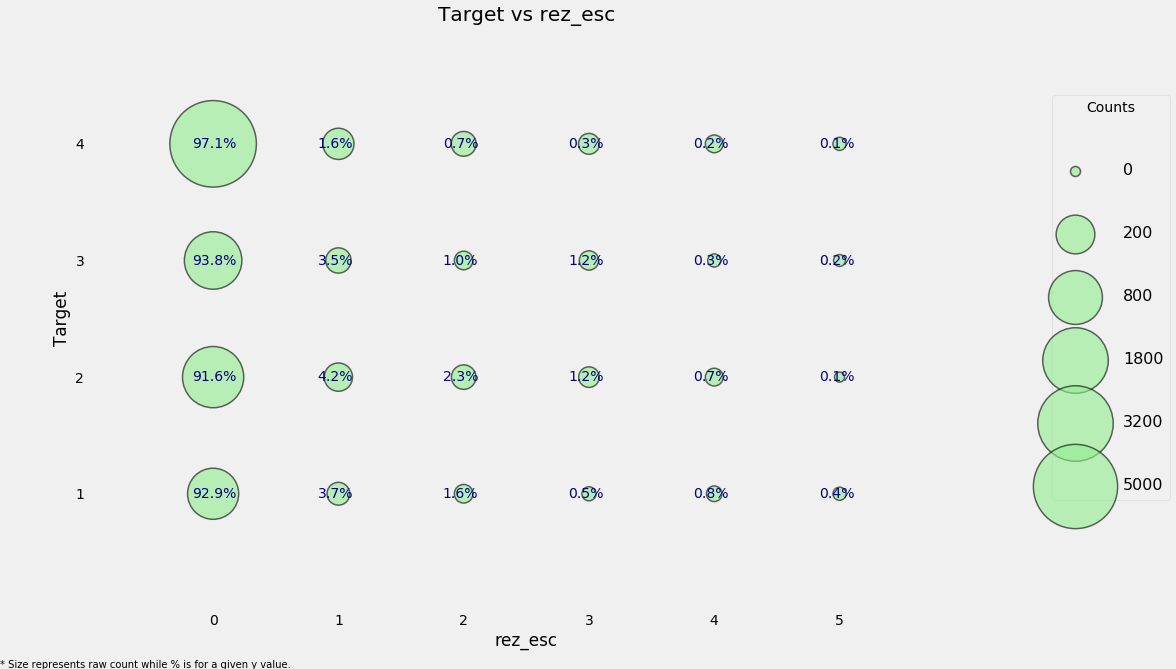

In [29]:
plot_categoricals('rez_esc', 'Target', data);

The size of the markers represents the raw count. To read the plot, choose a given y-value and then read across the row. For example, with a poverty level of 1, 93% of individuals have no years behind with a total count of around 800 individuals and about 0.4% of individuals are 5 years behind with about 50 total individuals in this category. This plot attempts to show both the overall counts and the within category proportion; it's not perfect , but I gave it a shot!  
標記的大小代表原始計數。 要讀取該圖，請選擇給定的y值，然後跨行讀取。 例如，貧困水平為1，有93％的人不落後任何年齡，總數約為800個人，而約0.4％的人則落後5年，總共有大約50個人。 該圖試圖顯示總計數和類別內比例； 這不是完美的，但我試了一下！

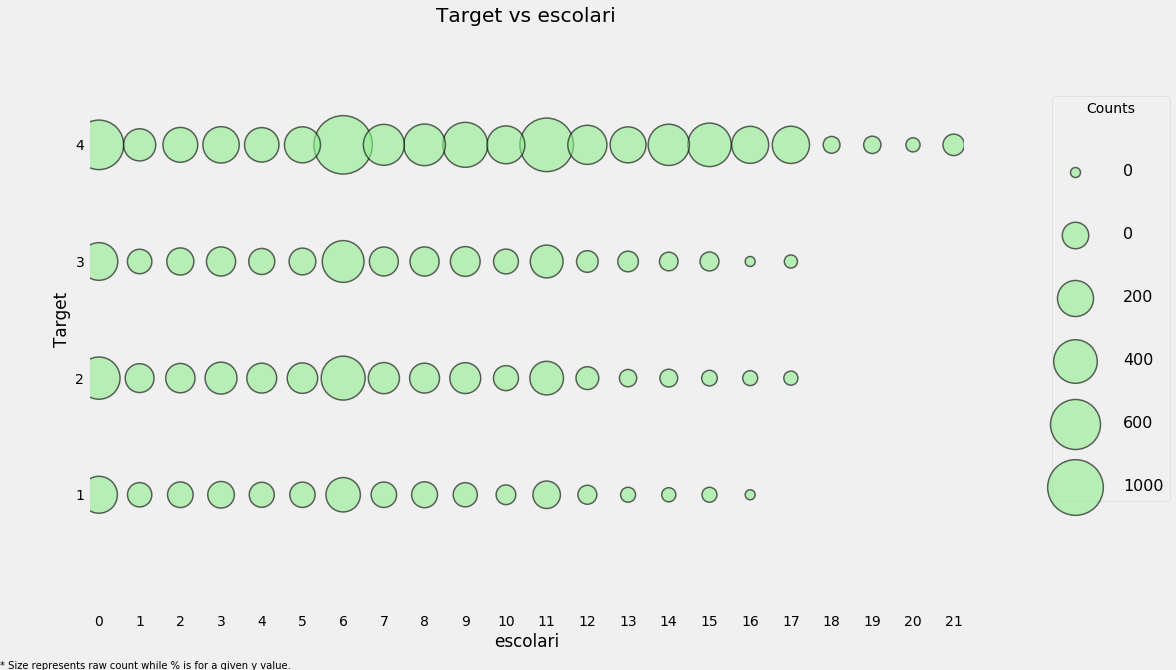

In [30]:
plot_categoricals('escolari', 'Target', data, annotate = False)

The remaining missing values in each column will be filled in, a process known as Imputation. There are several types of imputation commonly used, and one of the simplest and most effective methods is to fill in the missing values with the median of the column.  
  
As a final step with the missing values, we can plot the distribution of target for the case where either of these values are missing.  
將填充每一列中剩餘的缺失值，此過程稱為歸因。 常用的插補類型有幾種，最簡單，最有效的方法之一是用列的中位數填充缺失值。  

作為缺少值的最後一步，我們可以繪製出其中任一值都丟失的情況下目標的分佈圖。  

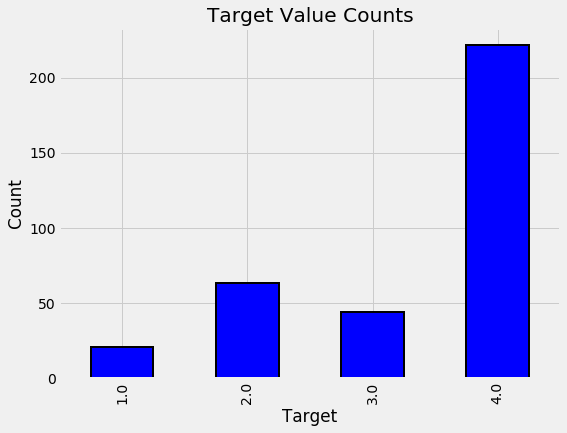

In [31]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 
                  'Target')

The distribution here seems to match that for all the data at large.  
這裡的分佈似乎與所有數據的分佈都匹配。

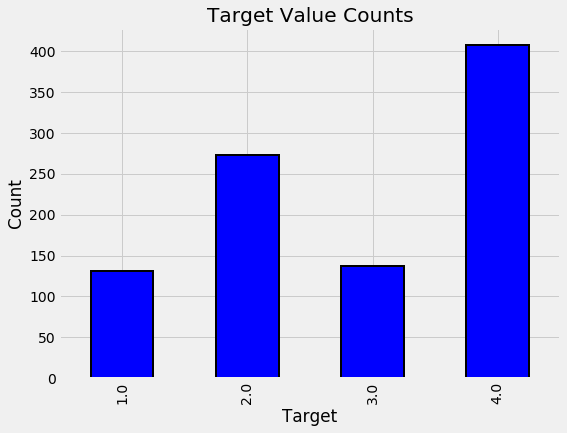

In [32]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 
                  'Target')

This looks like it could be an indicator of more poverty given the higher prevalence of 2: moderate poverty.  

This represents an important point: sometimes the missing information is just as important as the information you are given.  
    
鑑於2：中度貧困的患病率較高，這似乎可能是更多貧困的指標。  

這代表了重要的一點：有時，丟失的信息與您獲得的信息一樣重要。  

Feature Engineering  
There is plenty more exploratory data analysis we can do, but first we should work on consolidating our data at a household level. We already have some of the information for each household, but for training, we will need all of the information summarized for each household. This means grouping the individuals in a house (groupby) and performing an aggregation (agg) of the individual variables.  

In another notebook, I show how we can use automated feature engineering to do this, and automated feature engineering should be a standard part of the machine learning workflow. Right now, we'll stick to doing this by hand, but definitely take a look at automated feature engineering in Featuretools.   
特徵工程  
我們還可以進行更多探索性數據分析，但是首先我們應該在家庭層面上整合我們的數據。 我們已經掌握了每個家庭的一些信息，但是對於培訓，我們將需要匯總每個家庭的所有信息。 這意味著將一個人分組在一個房屋中（groupby），並對各個變量進行匯總（agg）。  

Column Definitions  
Sometimes in data science we have to get our hands dirty digging through the data or do tedious tasks that take a lot of time. This is that part of the analysis: we have to define the columns that are at an individual level and at a household level using the data decsriptions. There is simply no other way to identify which variables at are the household level than to go through the variables themselves in the data description. Except, I've already done this for you, so all you have to do is copy and paste!  

We'll define different variables because we need to treat some of them in a different manner. Once we have the variables defined on each level, we can work to start aggregating them as needed.  

The process is as follows  

Break variables into household level and invididual level  
Find suitable aggregations for the individual level data  
Ordinal variables can use statistical aggregations  
Boolean variables can also be aggregated but with fewer stats  
Join the individual aggregations to the household level data  
Define Variable Categories  
There are several different categories of variables:  
  
Individual Variables: these are characteristics of each individual rather than the household  
Boolean: Yes or No (0 or 1)  
Ordered Discrete: Integers with an ordering  
Household variables  
Boolean: Yes or No  
Ordered Discrete: Integers with an ordering  
Continuous numeric  
Squared Variables: derived from squaring variables in the data  
Id variables: identifies the data and should not be used as features  
Below we manually define the variables in each category. This is a little tedious, but also necessary.  

列定義  
有時，在數據科學中，我們不得不動手研究數據或執行耗時的繁瑣任務。這就是分析的一部分：我們必須使用數據描述來定義個人級別和家庭級別的列。除了在數據描述中遍歷變量本身之外，別無其他方法可以確定家庭級別的變量。除此以外，我已經為您完成了此操作，因此您只需複制和粘貼即可！  
  
我們將定義不同的變量，因為我們需要以不同的方式對待其中的一些變量。一旦我們在每個級別上定義了變量，就可以根據需要開始匯總它們。  
  
過程如下  
  
將變量分為家庭級別和個人級別  
查找適合各個級別數據的匯總  
序數變量可以使用統計匯總  
布爾變量也可以聚合，但統計信息較少  
將個人匯總加入家庭數據  
定義變量類別  
變量有幾種不同的類別：  
  
個人變量：這些是每個人而不是家庭的特徵  
布爾值：是或否（0或1）  
離散有序：帶整數的整數  
家庭變量  
布爾值：是或否  
離散有序：帶整數的整數   
連續數值  
平方變量：從數據中的平方變量派生  
ID變量：標識數據，不應該用作特徵  
在下面，我們手動定義每個類別中的變量。這有點乏味，但也是必要的。  

In [33]:
id_ = ['Id', 'idhogar', 'Target']

In [34]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [35]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [36]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

Let's make sure we covered all of the variables and didn't repeat any.  
讓我們確保我們覆蓋了所有變量並且沒有重複任何變量。

In [37]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


Squared Variables  
First, the easiest step: we'll remove all of the squared variables. Sometimes variables are squared or transformed as part of feature engineering because it can help linear models learn relationships that are non-linear. However, since we will be using more complex models, these squared features are redundant. They are highly correlated with the non-squared version, and hence can actually hurt our model by adding irrelevant information and also slowing down training.  

For an example, let's take a look at SQBage vs age.  
平方變量  
首先，最簡單的步驟：我們將刪除所有平方變量。 有時，將變量平方或變換作為特徵工程的一部分，因為它可以幫助線性模型學習非線性關係。 但是，由於我們將使用更複雜的模型，因此這些平方特徵是多餘的。 它們與非平方版本高度相關，因此實際上可能會通過添加不相關的信息並減慢訓練速度而損害我們的模型。  
  
例如，讓我們看一下SQBage與年齡的關係。  

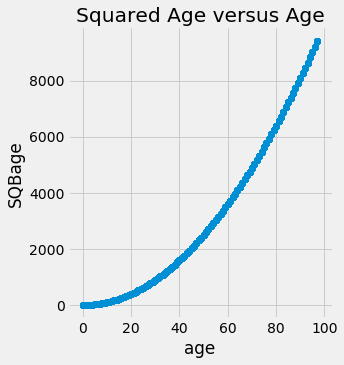

In [38]:
sns.lmplot('age', 'SQBage', data = data, fit_reg=False);
plt.title('Squared Age versus Age');

These variables are highly correlated, and we don't need to keep both in our data.  
 這些變量具有高度相關性，我們不需要將兩者都保留在我們的數據中。

In [39]:
# Remove squared variables
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

Id Variables  
These are pretty simple: they will be kept as is in the data since we need them for identification.  

Household Level Variables  
First let's subset to the heads of household and then to the household level variables.  
 
編號變數  
這些非常簡單：由於我們需要使用它們進行識別，因此它們將保留在數據中。  

家庭水平變量  
首先，讓我們將子集分配給戶主，然後再分配給家庭級別變量。  

In [40]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

For most of the household level variables, we can simply keep them as is: since we want to make predictions for each household, we use these variables as features. However, we can also remove some redundant variables and also add in some more features derived from existing data.  

Redundant Household Variables  
Let's take a look at the correlations between all of the household variables. If there are any that are too highly correlated, then we might want to remove one of the pair of highly correlated variables.  

The following code identifies any variables with a greater than 0.95 absolute magnitude correlation.  
對於大多數家庭水平變量，我們可以簡單地保持不變：由於我們要為每個家庭做出預測，因此我們將這些變量用作特徵。 但是，我們也可以刪除一些冗餘變量，並添加從現有數據派生的更多功能。  

冗餘家庭變量  
讓我們看一下所有家庭變量之間的相關性。 如果存在任何高度相關的變量，那麼我們可能要刪除一對高度相關的變量之一。  

以下代碼標識絕對值相關性大於0.95的所有變量。  

In [41]:
# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

These show one out of each pair of correlated variables. To find the other pair, we can subset the corr_matrix.  
這些顯示了每對相關變量中的一個。 為了找到另一對，我們可以對corr_matrix進行子集化。

In [42]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


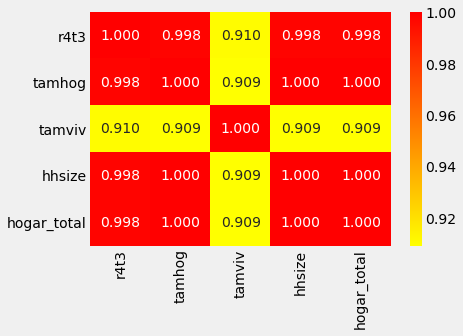

In [43]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

There are several variables here having to do with the size of the house:  

r4t3, Total persons in the household  
tamhog, size of the household  
tamviv, number of persons living in the household  
hhsize, household size  
hogar_total, # of total individuals in the household  
These variables are all highly correlated with one another. In fact, hhsize has a perfect correlation with tamhog and hogar_total. We will remove these two variables because the information is redundant. We can also remove r4t3 because it has a near perfect correlation with hhsize.  

tamviv is not necessarily the same as hhsize because there might be family members that are not living in the household. Let's visualize this difference in a scatterplot.  

這裡有幾個與房屋大小有關的變量：  

r4t3，家庭總人數  
tamhog，家庭大小  
hhsize，家庭人口  
hhsize，家庭人數  
hogar_total，家庭中總人數  
這些變量彼此高度相關。 實際上，hhsize與tamhog和hogar_total具有完美的關聯。 因為信息是多餘的，所以我們將刪除這兩個變量。 我們也可以刪除r4t3，因為它與hhsize具有幾乎完美的相關性。  

tamviv不一定與hhsize相同，因為可能有一些家庭成員不住在家裡。 讓我們在散點圖中可視化此差異。  

In [44]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

c:\users\綱欣\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


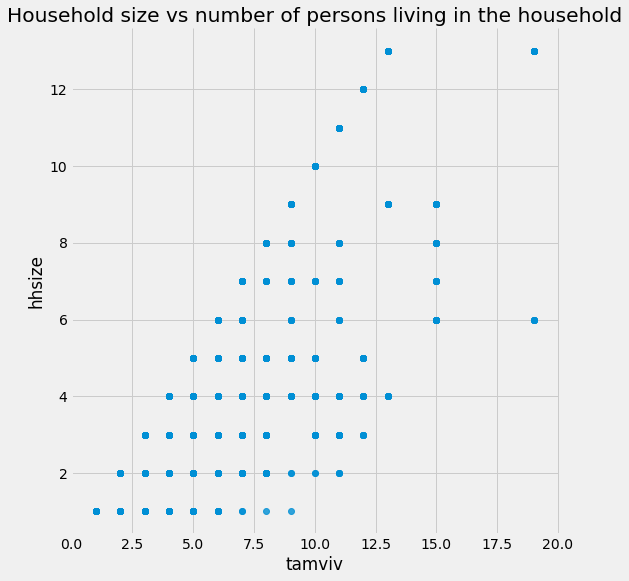

In [45]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size = 8);
plt.title('Household size vs number of persons living in the household');

We see for a number of cases, there are more people living in the household than there are in the family. This gives us a good idea for a new feature: the difference between these two measurements!  

Let's make this new feature.  
我們發現，在許多情況下，家庭居住的人口多於家庭居住的人口。 這為我們提供了一個新功能的好主意：這兩個測量值之間的差異！  
 
讓我們做這個新功能。  

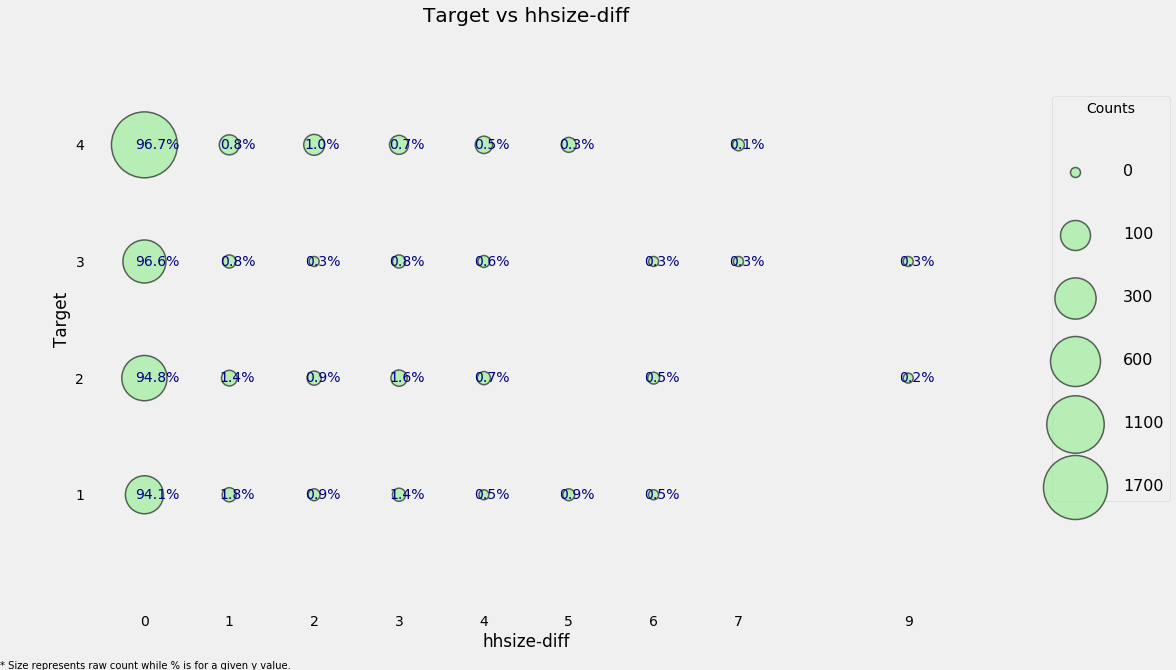

In [46]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

Even though most households do not have a difference, there are a few that have more people living in the household than are members of the household.  

Let's move on to the other redundant variables. First we can look at coopele  
即使大多數家庭沒有區別，但仍有少數人的家庭人口比家庭成員多。  

讓我們繼續其他冗餘變量。 首先我們來看一下coopele  

In [47]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


These variables indicate where the electricity in the home is coming from. There are four options, and the families that don't have one of these two options either have no electricity (noelec) or get it from a private plant (planpri).  
這些變量指示家庭用電的來源。 有四種選擇，沒有這兩種選擇之一的家庭沒有電（無電）或從私人工廠獲得電（普蘭普里）。

Creating Ordinal Variable  
I'm going to compress these four variables into one by creating an ordinal variable. I'm going to choose the mapping myself, based on the data decriptions:  

0: No electricity  
1: Electricity from cooperative  
2: Electricity from CNFL, ICA, ESPH/JASEC  
3: Electricity from private plant  
  
An ordered variable has an inherent ordering, and for this we choose our own based on the domain knowledge. After we create this new ordered variable, we can drop the four others. There are several households that do not have a variable here, so we will use a nan (which will be filled in during imputation) and add a Boolean column indicating there was no measure for this variable.  

創建序數變量  
我將通過創建一個序數變量將這四個變量壓縮為一個。 我將根據數據說明自行選擇映射：  

0：無電  
1：合作社發電  
2：來自CNFL，ICA，ESPH / JASEC的電力  
3：私人工廠的電力  

有序變量具有固有的順序，為此，我們根據領域知識選擇自己的變量。 創建此新的有序變量後，可以刪除其他四個變量。 這裡有幾個住戶沒有變量，因此我們將使用nan（在插補過程中將其填寫）並添加一個布爾列，指示該變量沒有度量。  

In [48]:
elec = []

# Assign values
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
# Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

# Remove the electricity columns
# heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

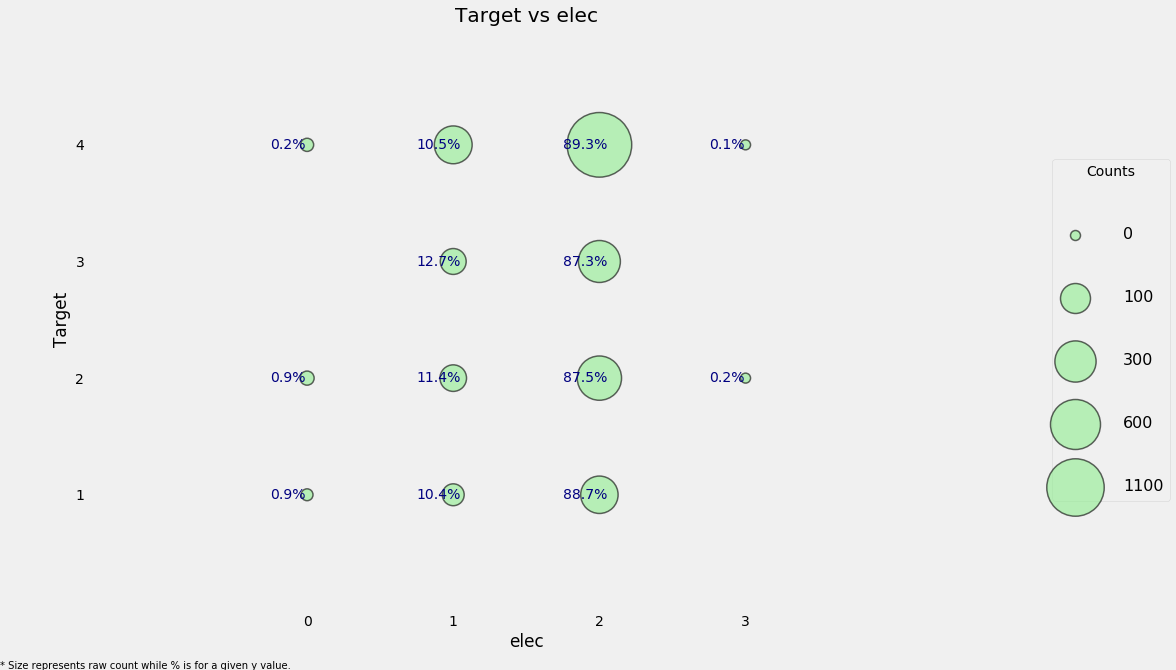

In [49]:
plot_categoricals('elec', 'Target', heads)

We can see that for every value of the Target, the most common source of electricity is from one of the listed providers.  

The final redundant column is area2. This means the house is in a rural zone, but it's redundant because we have a column indicating if the house is in a urban zone. Therefore, we can drop this column.  
我們可以看到，對於目標的每個價值，最常見的電力來源均來自列出的供應商之一。  

最後一個冗餘列是area2。 這意味著房屋位於農村地區，但這是多餘的，因為我們有一列指示房屋是否位於市區。 因此，我們可以刪除此列。  

In [50]:
heads = heads.drop(columns = 'area2')

heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

It seems like households in an urban area (value of 1) are more likely to have lower poverty levels than households in a rural area (value of 0).   
似乎城市地區（值為1）的家庭比農村地區（值為0）的家庭更容易陷入貧困。

Creating Ordinal Variables  
For the walls, roof, and floor of the house, there are three columns each: the first indicating 'bad', the second 'regular', and the third 'good'. We could leave the variables as booleans, but to me it makes more sense to turn them into ordinal variables because there is an inherent order: bad < regular < good. To do this, we can simply find whichever column is non-zero for each household using np.argmax.  

Once we have created the ordinal variable, we are able to drop the original variables.  
創建序數變量  
對於房屋的牆壁，屋頂和地板，每個都有三列：第一列表示“不良”，第二列表示“常規”，第三列表示“良好”。 我們可以將變量保留為布爾值，但對我而言，將它們轉換為序數變量更有意義，因為存在固有的順序：壞<常規<好。 為此，我們可以簡單地使用np.argmax查找每個家庭的哪一列都不為零。  
  
創建序數變量後，就可以刪除原始變量。  

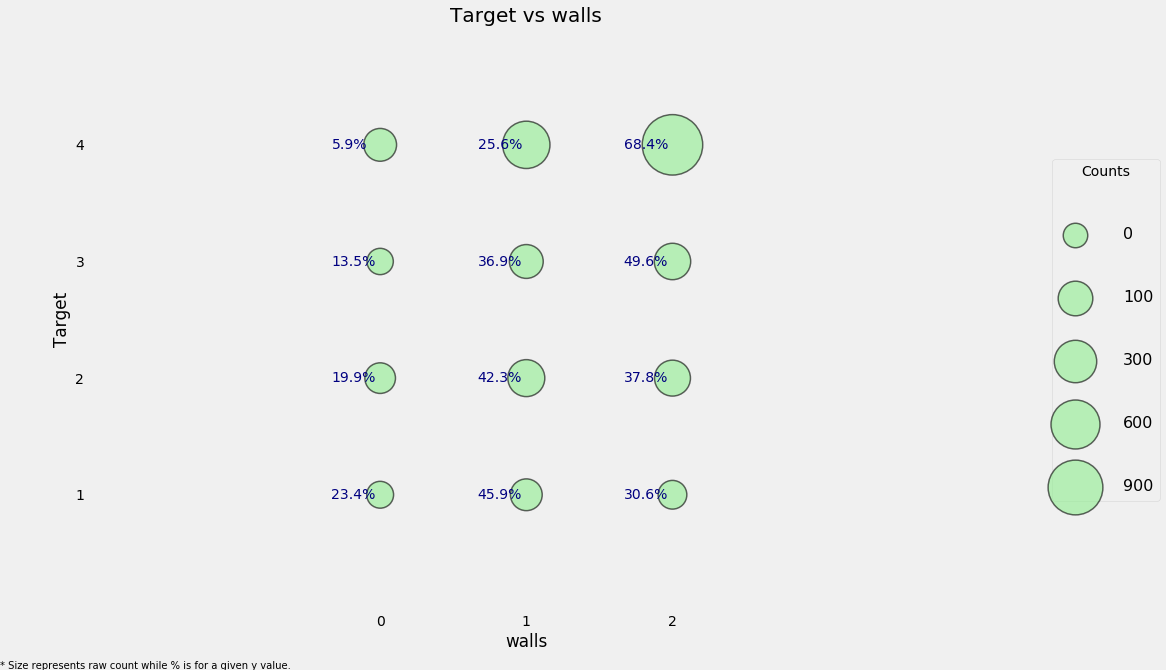

In [51]:
# Wall ordinal variable
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis = 1)

# heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])
plot_categoricals('walls', 'Target', heads)

In [52]:
# Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)
# heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

Feature Construction  
In addition to mapping variables to ordinal features, we can also create entirely new features from the existing data, known as feature construction. For example, we can add up the previous three features we just created to get an overall measure of the quality of the house's structure.  
特徵構造  
除了將變量映射到序數要素外，我們還可以根據現有數據創建全新的要素，稱為要素構造。 例如，我們可以將前面創建的三個功能加起來，以獲得對房屋結構質量的整體衡量。  

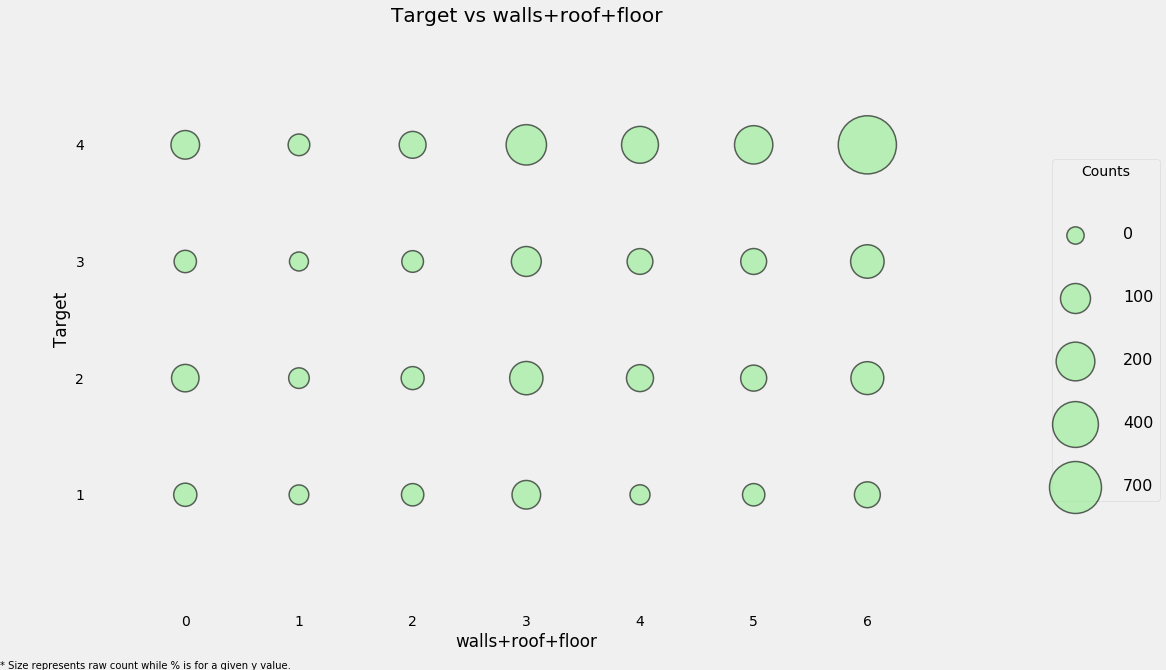

In [53]:
# Create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

This new feature may be useful because it seems like a Target of 4 (the lowest poverty level) tends to have higher values of the 'house quality' variable. We can also look at this in a table to get the fine-grained details.  
這項新功能很有用，因為似乎“目標4”（最低貧困水平）往往具有更高的“房屋質量”變量值。 我們也可以在表中查看它以獲取詳細信息。  

In [54]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()
counts.head()

,walls+roof+floor,Target,Normalized Count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529


The next variable will be a warning about the quality of the house. It will be a negative value, with -1 point each for no toilet, electricity, floor, water service, and ceiling.  

下一個變量將是關於房屋質量的警告。 這將是一個負值，沒有廁所，沒有電，沒有地板，沒有供水和沒有天花板，每個都為-1點。

In [55]:
# No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

We can keep using our plot_categoricals function to visualize these relationships, but seaborn also has a number of plotting options that can work with categoricals. One is the violinplot which shows the distribution of a variable on the y axis with the width of each plot showing the number of observations in that category.  
我們可以繼續使用我們的plot_categoricals函數來可視化這些關係，但是seaborn也有許多可以用於分類的繪圖選項。 一個是小提琴圖，它在y軸上顯示變量的分佈，每個圖的寬度顯示該類別中觀察值的數量。  

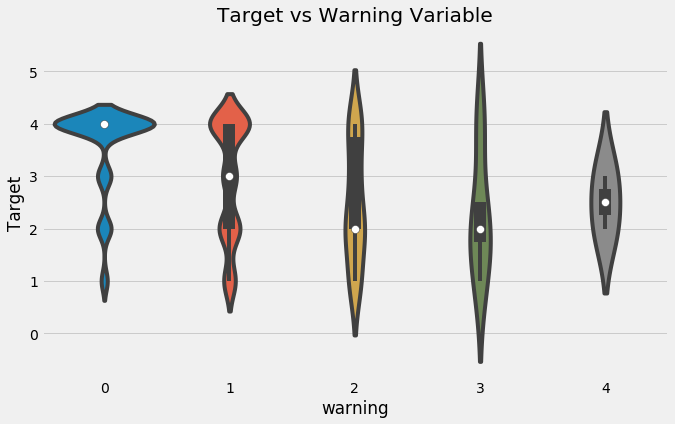

In [56]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'warning', y = 'Target', data = heads);
plt.title('Target vs Warning Variable');

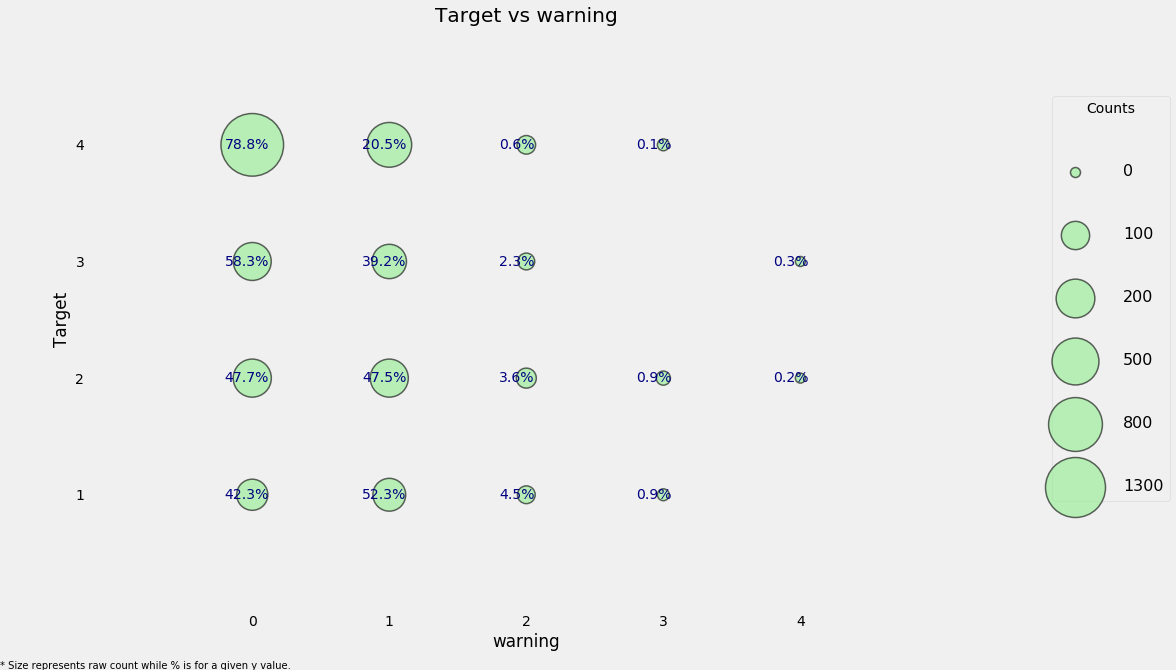

In [57]:
plot_categoricals('warning', 'Target', data = heads)

The violinplot is not great here because it smooths out the categorical variable with the effect that it looks as if the Target can take on lesser and greater values than in reality. Nonetheless, we can see a high concentration of households that have no warning signs and have the lowest level of poverty. It looks as if this may be a useful feature, but we can't know for sure until we get to modeling!  

The final household feature we can make for now is a bonus where a family gets a point for having a refrigerator, computer, tablet, or television.  
小提琴圖在這裡並不是很好，因為它可以平滑分類變量，從而使目標看起來好像目標可以接受比實際更少的值或更大的值。 但是，我們可以看到沒有警告信號且貧困程度最低的家庭高度集中。 看來這可能是一個有用的功能，但是直到開始建模我們才能確定！  

我們現在可以做的最後一項家庭功能是為家人提供冰箱，電腦，平板電腦或電視而獲得積分的獎勵。  

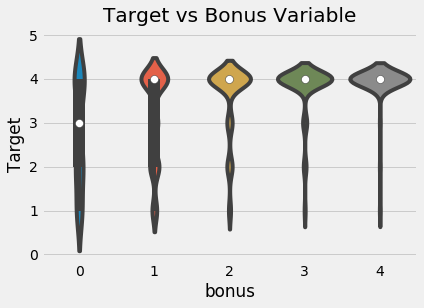

In [58]:
# Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                      heads['computer'] + 
                      (heads['v18q1'] > 0) + 
                      heads['television'])

sns.violinplot('bonus', 'Target', data = heads,
                figsize = (10, 6));
plt.title('Target vs Bonus Variable');

Per Capita Features  
Additional features we can make calculate the number of certain measurements for each person in the household.  


人均功能  
我們可以提供其他功能，以計算家庭中每個人的某些測量值。  

In [59]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

Exploring Household Variables  
After going to all the trouble of getting our features in order, now we can take a look at them in relation to the Target.   We've already done a little of this, but now we can try to quantify relationships.  

Measuring Relationships  
There are many ways for measuring relationships between two variables. Here we will examine two of these:  

The Pearson Correlation: from -1 to 1 measuring the linear relationship between two variables  
The Spearman Correlation: from -1 to 1 measuring the monotonic relationship between two variables  
The Spearman correlation is 1 if as one variable increases, the other does as well, even if the relationship is not linear. On the other hand, the Pearson correlation can only be one if the increase is exactly linear. These are best illustrated by example.

探索家庭變量  
解決了使我們的功能井然有序的所有麻煩之後，現在我們就可以相對於目標來查看它們。 我們已經做了一些這樣的事情，但是現在我們可以嘗試量化關係。  

衡量關係  
有很多方法可以測量兩個變量之間的關係。 在這裡，我們將研究其中兩個：  

皮爾遜相關係數：從-1到1測量兩個變量之間的線性關係  
Spearman相關：從-1到1測量兩個變量之間的單調關係  
如果一個變量增加，另一個變量也增加，則Spearman相關係數為1，即使該關係不是線性的。 另一方面，如果增量是完全線性的，則皮爾遜相關性只能是一個。 這些是最好的例子。  

In [60]:
from scipy.stats import spearmanr

In [61]:
def plot_corrs(x, y):
    """Plot data and show the spearman and pearson correlation."""
    
    # Calculate correlations
    spr = spearmanr(x, y).correlation
    pcr = np.corrcoef(x, y)[0, 1]
    
    # Scatter plot
    data = pd.DataFrame({'x': x, 'y': y})
    plt.figure( figsize = (6, 4))
    sns.regplot('x', 'y', data = data, fit_reg = False);
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

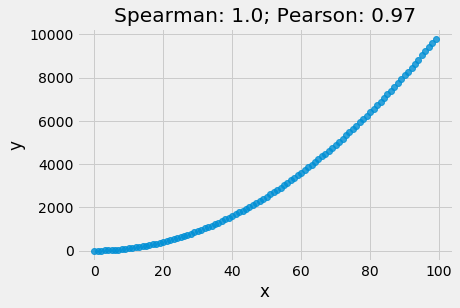

In [62]:
x = np.array(range(100))
y = x ** 2

plot_corrs(x, y)

The Spearman correlation is often considered to be better for ordinal variables such as the Target or the years of education. Most relationshisp in the real world aren't linear, and although the Pearson correlation can be an approximation of how related two variables are, it's inexact and not the best method of comparison.  
人們通常認為Spearman相關性對於諸如Target或受教育年限之類的序數變量更好。 現實世界中大多數關係都不是線性的，儘管皮爾遜相關性可以近似表示兩個變量之間的相關性，但這並不精確，也不是最佳的比較方法。  


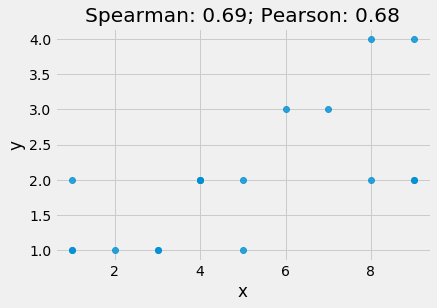

In [63]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

In most cases, the values are very similar.  
在大多數情況下，這些值非常相似。

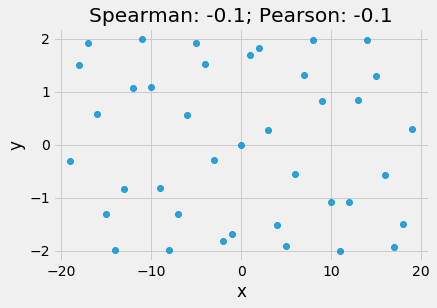

In [64]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)

First, we'll calculate the Pearson correlation of every variable with the Target.  
首先，我們將計算每個變量與目標之間的皮爾遜相關性。

In [65]:
# Use only training data
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


For the negative correlations, as we increase the variable, the Target decreases indicating the poverty severity increases. Therefore, as the warning increases, the poverty level also increases which makes sense because this was meant to show potential bad signs about a house. The hogar_nin is the number of children 0 - 19 in the family which also makes sense: younger children can be financial source of stress on a family leading to higher levels of poverty. Or, families with lower socioeconomic status have more children in the hopes that one of them will be able to succeed. Whatever the explanation, there is a real link between family size and poverty  
  
On the other hand, for the positive correlations, a higher value means a higher value of Target indicating the poverty severity decreases. The most highly correlated household level variable is meaneduc, the average education level of the adults in the household. This relationship between education and poverty intuitively makes sense: greater levels of education generally correlate with lower levels of poverty. We don't necessarily know which causes which, but we do know these tend to move in the same direction.  

The general guidelines for correlation values are below, but these will change depending on who you ask (source for these):  
  
.00-.19 “very weak”  
.20-.39 “weak”  
.40-.59 “moderate”  
.60-.79 “strong”  
.80-1.0 “very strong”  
What these correlations show is that there are some weak relationships that hopefully our model will be able to use to learn a mapping from the features to the Target.  
  
Now we can move on to the Spearman correlation.  
對於負相關，當我們增加變量時，目標降低，表明貧困嚴重程度增加。因此，隨著警告的增加，貧困水平也增加了，這是有道理的，因為這是為了表明房屋的潛在不良跡象。 hogar_nin是家庭中0到19歲的孩子的數量，這也很有意義：年齡較小的孩子可能是導致家庭壓力增加的財務壓力，導致貧困加劇。或者，社會經濟地位較低的家庭有更多的孩子，希望其中一個能夠成功。不管有什麼解釋，家庭規模與貧困之間都有真正的聯繫  

另一方面，對於正相關，較高的值表示Target的較高值，表明貧困程度降低。與家庭水平相關性最高的變量是meanuc，即家庭中成年人的平均教育水平。教育與貧困之間的這種關係在直覺上是有道理的：較高的教育水平通常與較低的貧困水平相關。我們不一定知道是哪個原因引起的，但是我們確實知道這些原因傾向於相同的方向。  

下面是相關值的一般準則，但是這些準則會根據您要求的人而有所變化（這些信息的來源）：  
  
.00-.19“非常弱”  
.20-.39“弱”  
.40-.59“中度” 
.60-.79“強”  
.80-1.0“非常強大”  
這些相關性表明，存在一些微弱的關係，希望我們的模型能夠用來學習從要素到目標的映射。  
  
現在我們可以繼續進行Spearman相關。  

In [66]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iterate through each column
for c in heads:
    # Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)
        
        # Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

The Spearman correlation coefficient calculation also comes with a pvalue indicating the significance level of the relationship. Any pvalue less than 0.05 is genearally regarded as significant, although since we are doing multiple comparisons, we want to divide the p-value by the number of comparisons, a process known as the Bonferroni correction.  
Spearman相關係數計算還帶有一個p值，該值指示關係的顯著性水平。 通常，任何小於0.05的p值都被認為是有意義的，儘管由於我們正在進行多次比較，所以我們希望將p值除以比較次數，這一過程稱為Bonferroni校正。  


In [67]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


For the most part, the two methods of calculating correlations are in agreement. Just out of curiousity, we can look for the values that are furthest apart.  
在大多數情況下，兩種計算相關性的方法是一致的。 出於好奇，我們可以尋找距離最遠的值。

In [68]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
77,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
85,v18q1,0.197493,0.244200,1.282664e-41,-0.046708
87,tablets-per-capita,0.204638,0.248642,3.951568e-43,-0.044004
2,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
97,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351


In [69]:
corrs.sort_values('diff').dropna().tail()

,feature,pcorr,scorr,pvalue,diff
57,techozinc,0.014357,0.003404,8.528369e-01,0.010954
49,hogar_mayor,-0.025173,-0.041722,2.290994e-02,0.016549
88,edjefe,0.235687,0.214736,2.367521e-32,0.020951
66,edjefa,0.052310,0.005114,7.804715e-01,0.047197
17,dependency,-0.126465,-0.281516,2.792620e-55,0.155051


The largest discrepancy in the correlations is dependency. We can make a scatterplot of the Target versus the dependency to visualize the relationship. We'll add a little jitter to the plot because these are both discrete variables.  
相關性中最大的差異是依賴性。 我們可以對目標與依賴關係進行散點圖以可視化關係。 我們將在圖中增加一點抖動，因為它們都是離散變量。  


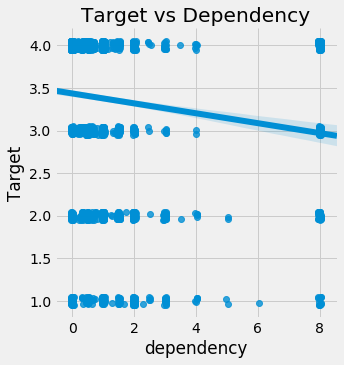

In [70]:
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Dependency');

It's hard to see the relationship, but it's slightly negative: as the dependency increases, the value of the Target decreases. This makes sense: the dependency is the number of dependent individuals divided by the number of non-dependents. As we increase this value, the poverty severty tends to increase: having more dependent family members (who usually are non-working) leads to higher levels of poverty because they must be supported by the non-dependent family members.  
很難看到這種關係，但是它有點消極：隨著依賴性的增加，Target的值減小。 這是有道理的：依賴性是依賴性個體的數量除以非依賴性個體的數量。 隨著我們增加這一價值，貧困程度趨於增加：擁有更多受撫養家庭成員（通常是無業）會導致更高水平的貧困，因為他們必須得到非撫養家庭成員的支持。  

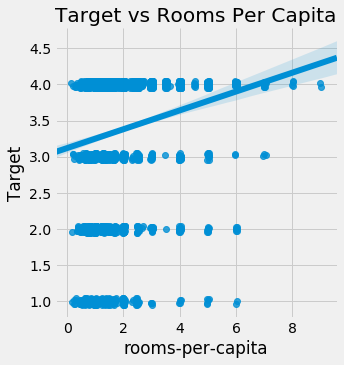

In [71]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Rooms Per Capita');

Correlation Heatmap  
One of my favorite plots is the correlation heatmap because it shows a ton of info in one image. For the heatmap, we'll pick 7 variables and show the correlations between themselves and with the target  
關聯熱圖  
我最喜歡的圖之一是相關熱圖，因為它在一張圖像中顯示了大量信息。 對於熱圖，我們將選擇7個變量並顯示它們之間以及與目標之間的相關性  

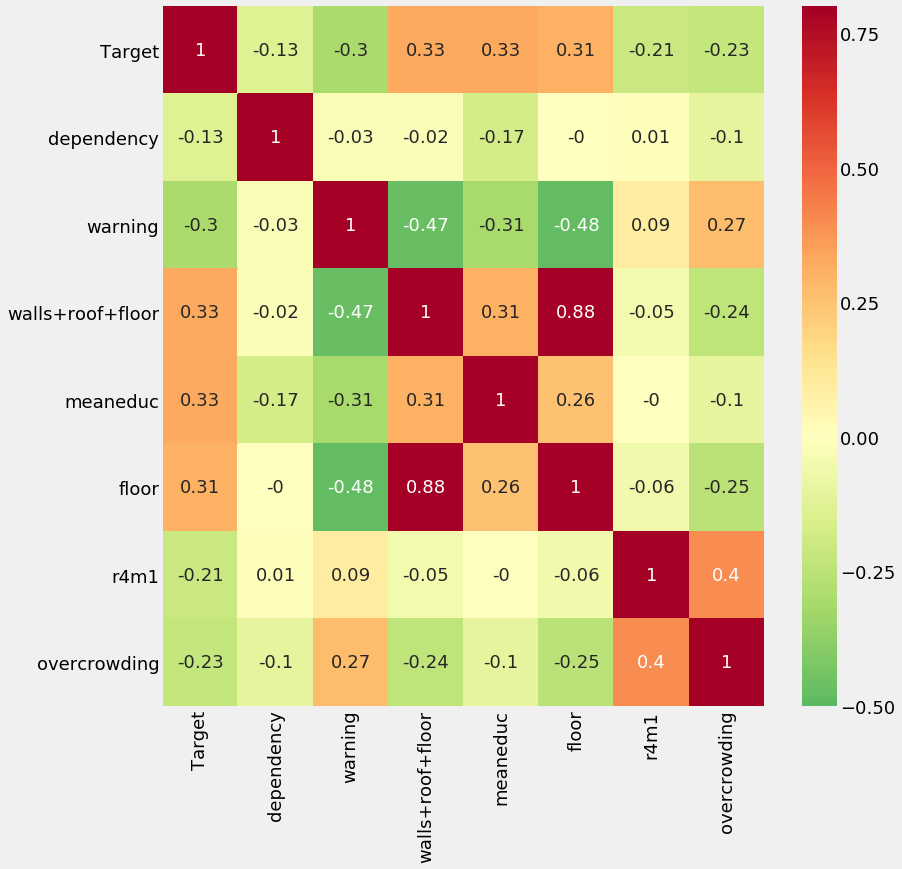

In [72]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

# Calculate the correlations
corr_mat = train_heads[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

This plot shows us that there are a number of variables that have a weak correlation with the Target. There are also high correlations between some variables (such as floor and walls+roof+floor) which could pose an issue because of collinearity.  
該圖顯示了許多變量與目標的相關性較弱。 在某些變量（例如地板和牆壁+屋頂+地板）之間也存在高度相關性，這可能由於共線性而引起問題。

  Features Plot¶  
For the final exploration of the household level data, we can make a plot of some of the most correlated variables with the Target. This shows scatterplots on the upper triangle, kernel density estimate (kde) plots on the diagonal, and 2D KDE plots on the lower triangle. 
功能圖¶  
為了最終探索家庭水平數據，我們可以繪製一些與目標最相關的變量。 這在上三角顯示散點圖，在對角線上顯示核密度估計（kde）圖，在下三角顯示2D KDE圖。  

In [73]:
# plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
#                          'meaneduc', 'overcrowding']]
# plot_data['meaneduc'] = plot_data['meaneduc'].fillna(plot_data['meaneduc'].median())


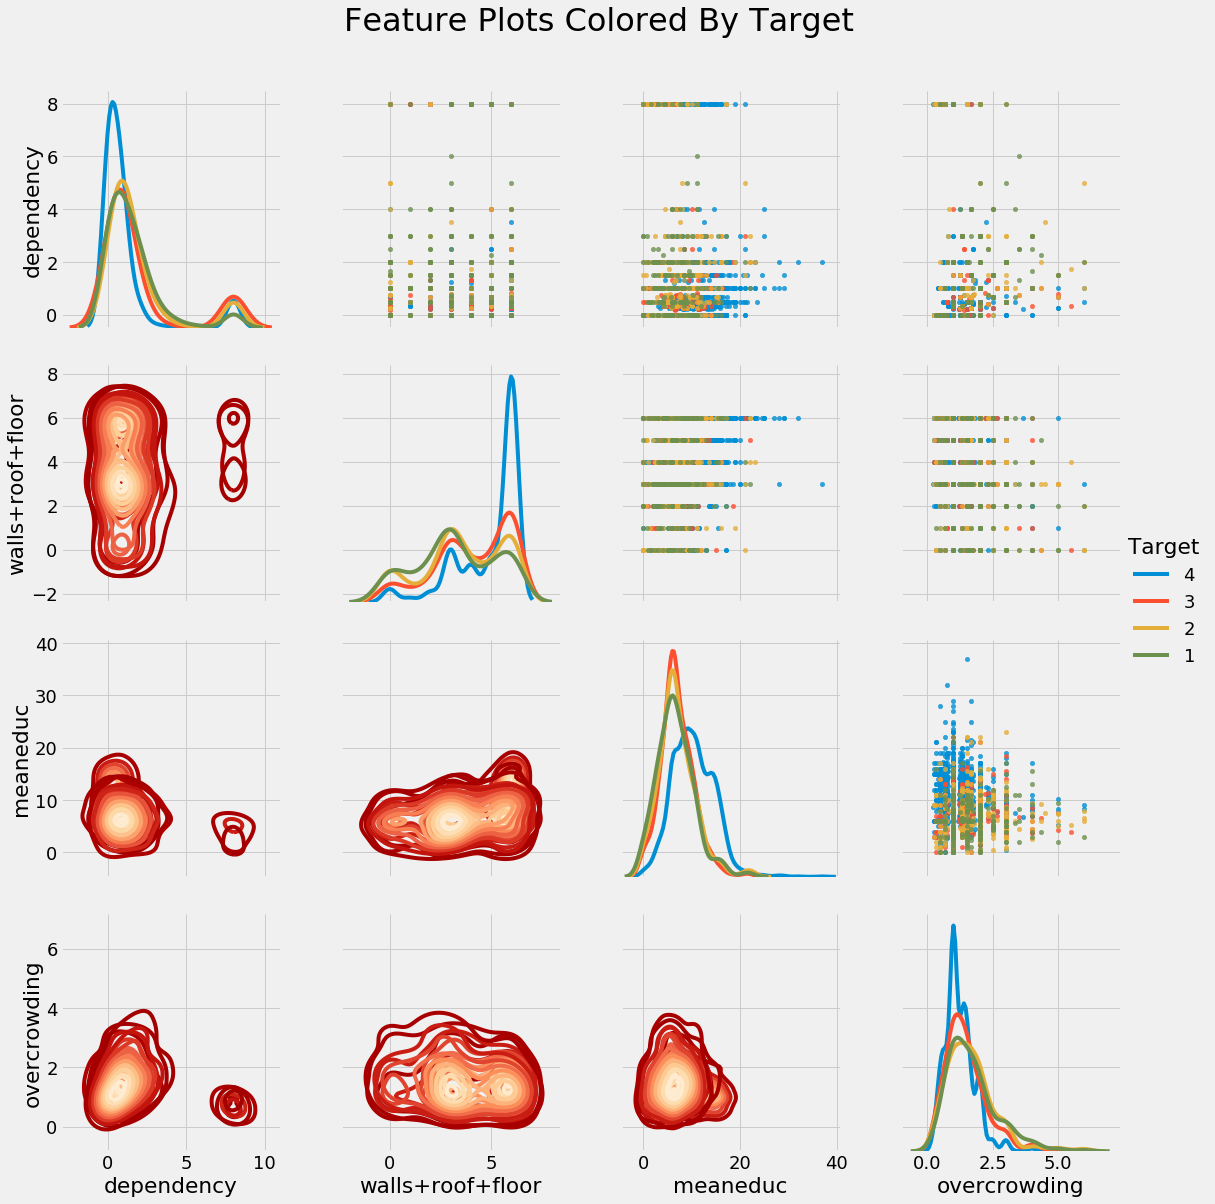

In [74]:
import warnings
warnings.filterwarnings('ignore')

# Copy the data for plotting
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]
# 額外追加修正補空直
plot_data['meaneduc'] = plot_data['meaneduc'].fillna(plot_data['meaneduc'].median())

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

We'll leave the feature engineering of the household variables for now. Later, we can come back to this step if we are not pleased with the model performance.  
現在，我們將保留住戶變量的特徵工程。 以後，如果我們對模型的性能不滿意，可以回到這一步。  

In [75]:
household_feats = list(heads.columns)

Individual Level Variables  
There are two types of individual level variables: Boolean (1 or 0 for True or False) and ordinal (discrete values with a meaningful ordering).  
各個級別變量  
單個級別變量有兩種類型：布爾型（對於True或False，為1或0）和序數（具有有意義順序的離散值）。  

In [76]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

Redundant Individual Variables  
We can do the same process we did with the household level variables to identify any redundant individual variables. We'll focus on any variables that have an absolute magnitude of the correlation coefficient greater than 0.95.  
冗餘個體變量  
我們可以使用與家庭水平變量相同的過程來識別任何冗餘的單個變量。 我們將關注相關係數的絕對大小大於0.95的所有變量。  

In [77]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

 This is simply the opposite of male! We can remove the male flag.  
這與男性完全相反！ 我們可以刪除男性標誌。  

In [78]:
ind = ind.drop(columns = 'male')

 Creating Ordinal Variables  
Much as we did with the household level data, we can map existing columns to an ordinal variable. Here we will focus on the instlevel_ variables which indicate the amount of education an individual has from instlevel1: no level of education to instlevel9: postgraduate education.  

To create the ordinal variable, for each individual, we will simply find which column is non-zero. The education has an inherent ordering (higher is better) so this conversion to an ordinal variable makes sense in the problem context.  
創建序數變量  
就像我們處理住戶數據一樣，我們可以將現有列映射到一個序數變量。 在這裡，我們將重點關注instlevel_變量，這些變量指示個人從instlevel1：無教育水平到instlevel9：研究生教育的程度。 

為了創建序數變量，我們將為每個人簡單地找到哪一列非零。 教育具有固有的順序（越高越好），因此在問題上下文中將此轉換為序數變量是有意義的。 

In [79]:
ind[[c for c in ind if c.startswith('instl')]].head()

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


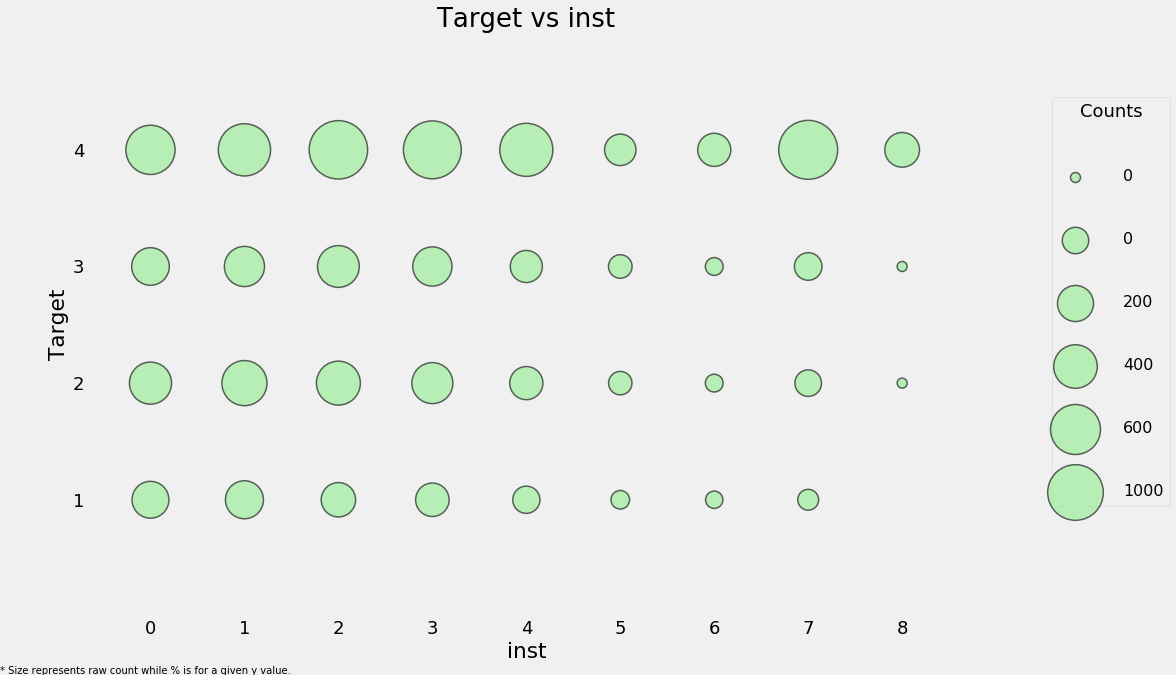

In [80]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)

plot_categoricals('inst', 'Target', ind, annotate = False);

Higher levels of education seem to correspond to less extreme levels of poverty. We do need to keep in mind this is on an individual level though and we eventually will have to aggregate this data at the household level.  
較高的教育水平似乎與較低的極端貧困水平相對應。 我們確實需要記住，這是在個人層面上，我們最終將不得不在家庭層面上匯總這些數據。  

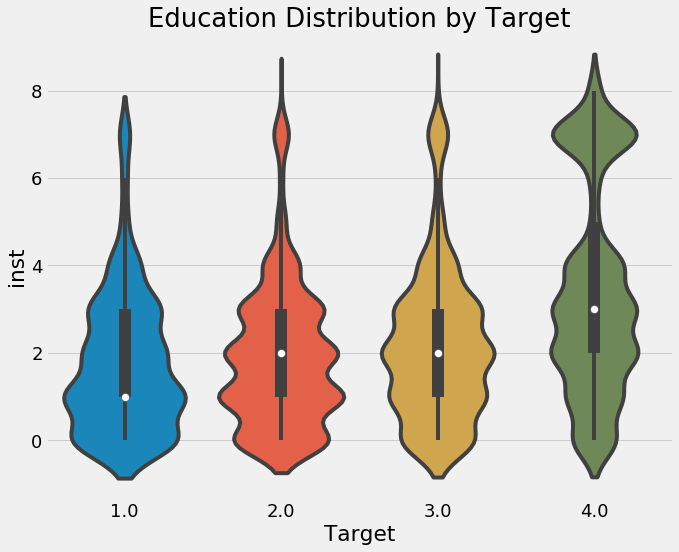

In [81]:
plt.figure(figsize = (10, 8))
sns.violinplot(x = 'Target', y = 'inst', data = ind);
plt.title('Education Distribution by Target');

In [82]:
# Drop the education columns
# ind = ind.drop(columns = [c for c in ind if c.startswith('instlevel')])
ind.shape

(33413, 40)

 Feature Construction  
We can make a few features using the existing data. For example, we can divide the years of schooling by the age.  
特徵構造  
我們可以使用現有數據做一些功能。 例如，我們可以將學年除以年齡。

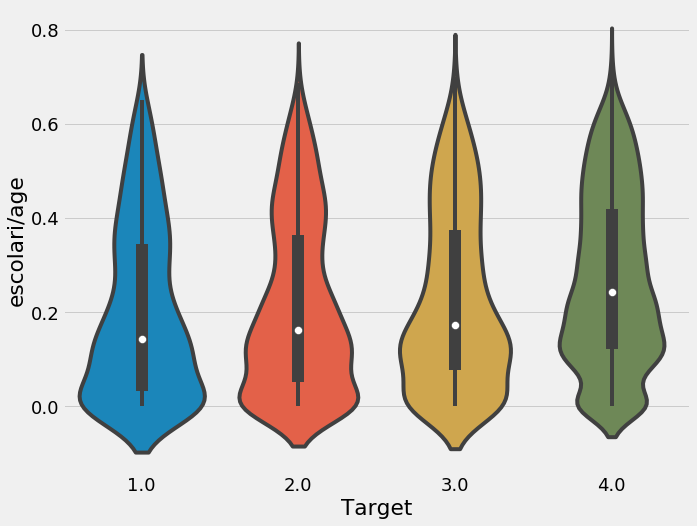

In [83]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize = (10, 8))
sns.violinplot('Target', 'escolari/age', data = ind);

We can also take our new variable, inst, and divide this by the age. The final variable we'll name tech: this represents the combination of tablet and mobile phones.  

我們還可以採用新的變量inst並將其除以年齡。 我們將最後一個變量命名為tech：這代表平板電腦和手機的組合。

In [84]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

Feature Engineering through Aggregations  
In order to incorporate the individual data into the household data, we need to aggregate it for each household.  
The simplest way to do this is to groupby the family id idhogar and then agg the data. 
For the aggregations for ordered or continuous variables, we can use six, five of which are built in to pandas, and one of which we define ourselves range_.  
The boolean aggregations can be the same, but this will create many redundant columns which we will then need to drop.  
For this case, we'll use the same aggregations and then go back and drop the redundant columns.

通過聚合進行要素工程  
為了將單個數據合併到家庭數據中，我們需要針對每個家庭進行匯總。  
最簡單的方法是對家庭ID idhogar進行分組，然後匯總數據。  
對於有序或連續變量的聚合，我們可以使用六種，其中五種內置於大熊貓中，其中一種我們定義為range_。  
布爾聚合可以相同，但這將創建許多冗餘列，然後我們需要將其刪除。  
對於這種情況，我們將使用相同的聚合，然後返回並刪除冗餘列。  

In [85]:
# Define custom function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# Group and aggregate
ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

With just that one line, we go from 30 features to 180. Next we can rename the columns to make it easier to keep track.  
僅需一行，我們就從30個要素變為180個要素。接下來，我們可以重命名各列，以使其更易於跟踪。

In [86]:
# Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_,female-min,female-max,female-sum,female-count,female-std,female-range_,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,estadocivil6-range_,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-count,estadocivil7-std,estadocivil7-range_,parentesco1-min,parentesco1-max,parentesco1-sum,parentesco1-count,parentesco1-std,parentesco1-range_,parentesco2-min,parentesco2-max,parentesco2-sum,parentesco2-count,parentesco2-std,parentesco2-range_,parentesco3-min,parentesco3-max,parentesco3-sum,...,instlevel5-count,instlevel5-std,instlevel5-range_,instlevel6-min,instlevel6-max,instlevel6-sum,instlevel6-count,instlevel6-std,instlevel6-range_,instlevel7-min,instlevel7-max,instlevel7-sum,instlevel7-count,instlevel7-std,instlevel7-range_,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-count,instlevel8-std,instlevel8-range_,instlevel9-min,instlevel9-max,instlevel9-sum,instlevel9-count,instlevel9-std,instlevel9-range_,mobilephone-min,mobilephone-max,mobilephone-sum,mobilephone-count,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,rez_esc-sum,rez_esc-count,rez_esc-std,rez_esc-range_,escolari-min,escolari-max,escolari-sum,escolari-count,escolari-std,escolari-range_,age-min,age-max,age-sum,age-count,age-std,age-range_,inst-min,inst-max,inst-sum,inst-count,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-count,escolari/age-std,escolari/age-range_,inst/age-min,inst/age-max,inst/age-sum,inst/age-count,inst/age-std,inst/age-range_,tech-min,tech-max,tech-sum,tech-count,tech-std,tech-range_
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,0.000000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,2,3,0.57735,1,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.000000,0,0,0,0,3,0.0,0,0,0,0,3,0.00000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,1,...,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,1,2,3,0.577350,1,0,0,0,3,0.0,0,1,1,3,3,0.0,0,0.0,0.0,0.0,3,0.0,0.0,0,14,26,3,7.571878,14,4,30,62,3,14.468356,26,0,7,14,3,4.041452,7,0.000000,0.500000,0.900000,3,0.264575,0.500000,0.000000,0.250000,0.483333,3,0.139775,0.250000,2,2,6,3,0.0,0
000bce7c4,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,2,0.000000,0,0,0,0,2,0.00000,0,1,1,2,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,...,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,1,1,2,2,0.0,0,0.0,0.0,0.0,2,0.0,0.0,0,5,5,2,3.535534,5,60,63,123,2,2.121320,3,0,1,1,2,0.707107,1,0.000000,0.083333,0.083333,2,0.058926,0.083333,0.000000,0.016667,0.016667,2,0.011785,0.016667,1,1,2,2,0.0,0
001845fb0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,1,2,4,0.577350,1,0,0,0,4,0.000000,0,0,1,2,4,0.57735,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,0,0,4,0.0,0,0,1,2,4,0.57735,1,0,1,1,4,0.500000,1,0,1,1,4,0.500000,1,0,1,2,...,4,0.5,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,1,1,4,0.500000,1,0,0,0,4,0.0,0,1,1,4,4,0.0,0,0.0,0.0,0.0,3,0.0,0.0,6,14,41,4,3.304038,8,19,52,142,4,16.421531,33,2,7,16,4,2.160247,5,0.115385,0.526316,1.397906,4,0.183106,0.410931,0.038462,0.166667,0.511959,4,0.060123,0.128205,1,1,4,4,0.0,0
001ff74ca,1,1,2,2,0.0,0,0,0,0,2,0.000000,0,1,1,2,2,0.000000,0,0,1,1,2,0.707107,1,0,0,0,2,0.00

In [87]:
ind_agg.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9]].head()

,v18q-min,v18q-max,v18q-sum,v18q-count,dis-min,dis-max,dis-sum,dis-count
idhogar,,,,,,,,
000a08204,1,1,3,3,0,0,0,3
000bce7c4,0,0,0,2,0,1,1,2
001845fb0,0,0,0,4,0,0,0,4
001ff74ca,1,1,2,2,0,0,0,2
003123ec2,0,0,0,4,0,0,0,4


Feature Selection  
As a first round of feature selection, we can remove one out of every pair of variables with a correlation greater than 0.95. 
功能選擇  
作為第一輪特徵選擇，我們可以從相關性大於0.95的每對變量中刪除一個。  

In [88]:
# Create correlation matrix
corr_matrix = ind_agg.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


We'll drop the columns and then merge with the heads data to create a final dataframe.  
我們將刪除列，然後與heads數據合併以創建最終數據框。

In [89]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

# Merge on the household id
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 228)


In [90]:
final.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,...,parentesco6-max,parentesco6-sum,parentesco7-min,parentesco7-max,parentesco8-min,parentesco8-max,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco10-min,parentesco10-max,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco12-min,parentesco12-max,parentesco12-sum,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-std,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-std,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-std,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel6-min,instlevel6-max,instlevel7-min,instlevel7-max,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-std,instlevel9-min,instlevel9-max,mobilephone-min,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_,age-min,age-max,age-sum,age-std,age-range_,inst-max,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std,tech-range_
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,190000.0,0.0,10.0,0.0,10.0,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,NaN,0,0.0,0.0,10,10,10,NaN,0,43,43,43,NaN,0,3,NaN,0,0.232558,0.232558,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,135000.0,8.0,12.0,0.0,12.0,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,1,1,1,NaN,0,0,1,NaN,0,0.0,0.0,12,12,12,NaN,0,67,67,67,NaN,0,7,NaN,0,0.179104,0.179104,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,False,0.0,8.0,0.0,11.0,11.0,0.500000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0.0,0.0,11,11,11,NaN,0,92,92,92,NaN,0,4,NaN,0,0.119565,0.119565,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0
3,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,180000.0,1.0,11.0,0.0,11.0,1.333333,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,2,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,2,11,33,4.272002,9,8,38,100,14.899664,30,4,1.414214,3,0.250000,0.529412,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0
4,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,130000.0,1.0,9.0,0.0,10.0,4.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,1,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,0,11,23,5.123475,11,7,30,76,11.690452,23,4,1.825742,4,0.000000,0.392857,0.965584,0.168946,0.392857,0.142857,0.060063,0.142857,1,4,0.0,0


Final Data Exploration  
We'll do a little bit of exploration.  
最終數據探索  
我們將進行一些探索。  

In [91]:
corrs = final.corr()['Target']

In [92]:
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [93]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

We can see some of the variables that we made are highly correlated with the Target. Whether these variables are actually useful will be determined in the modeling stage.  
我們可以看到我們所做的一些變量與目標高度相關。 這些變量是否真正有用將在建模階段確定。

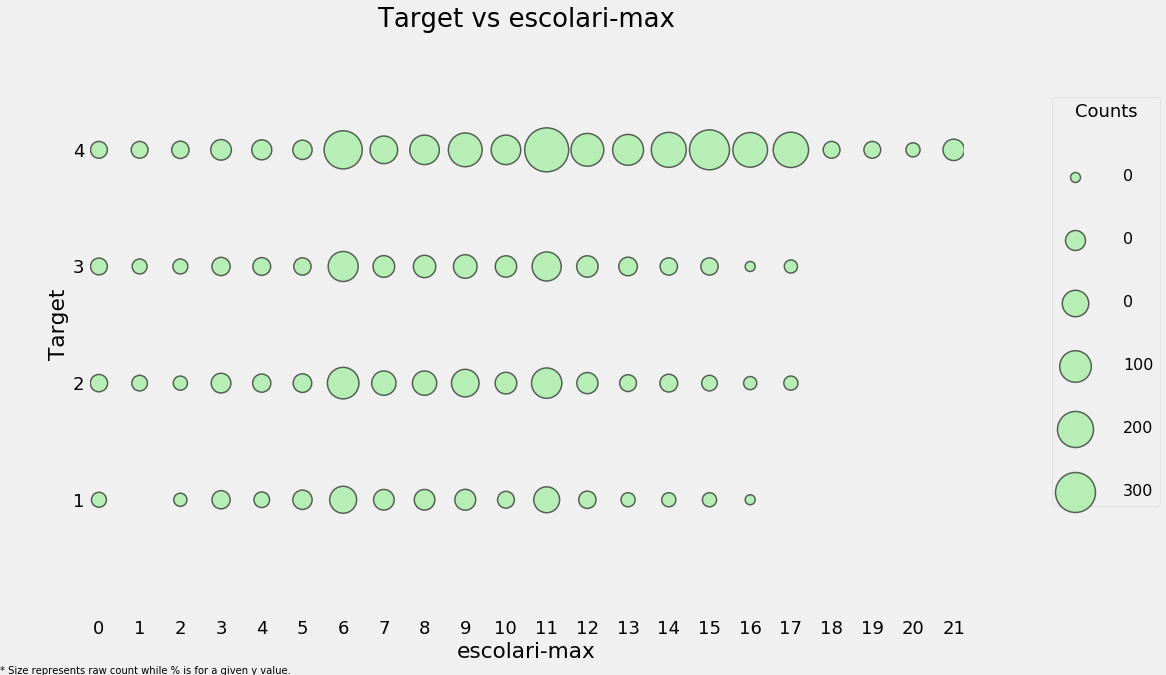

In [94]:
plot_categoricals('escolari-max', 'Target', final, annotate=False);

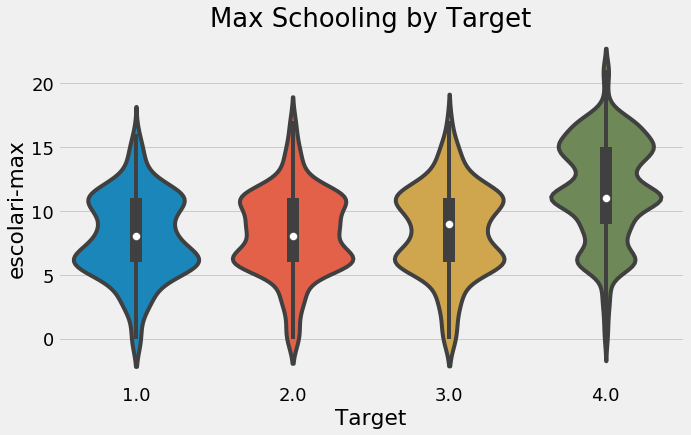

In [95]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

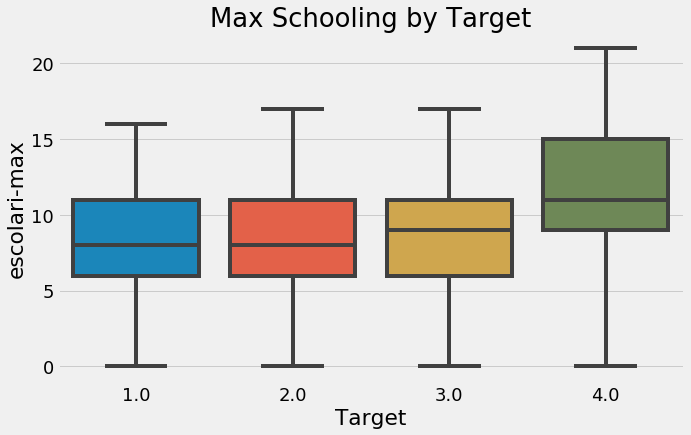

In [96]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

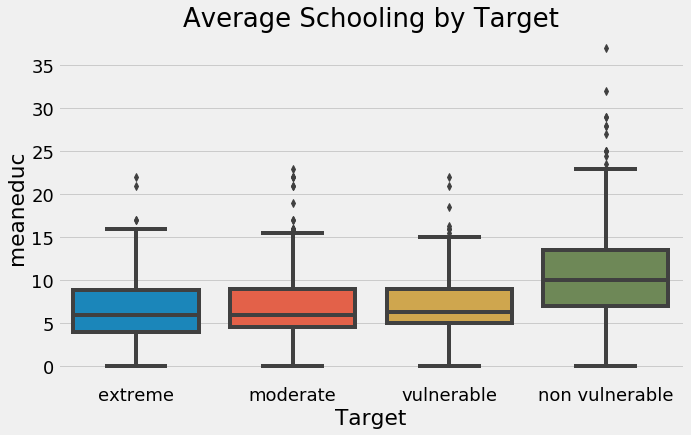

In [97]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Average Schooling by Target');

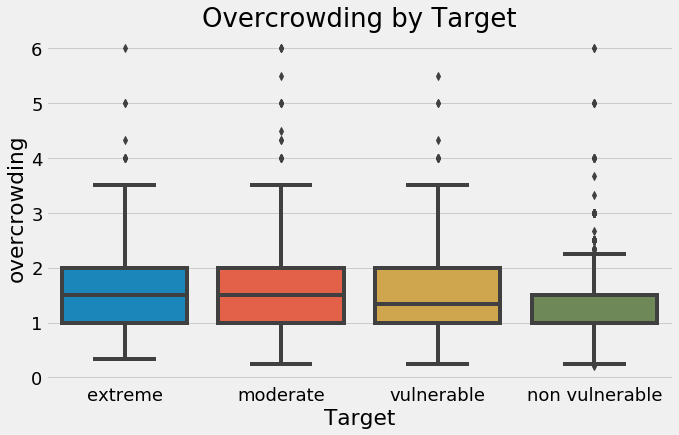

In [98]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'overcrowding', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Overcrowding by Target');

One other feature that might be useful is the gender of the head of household. Since we aggregated the data, we'll have to go back to the individual level data and find the gender for the head of household.  
戶主的性別可能是另一個有用的功能。 由於我們匯總了數據，因此我們必須返回個人數據並找到戶主的性別。

In [99]:
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female': 'female-head'})

In [100]:
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

It looks like households where the head is female are slightly more likely to have a severe level of poverty.  
看起來，戶主是女性的家庭似乎更容易出現嚴重的貧困。

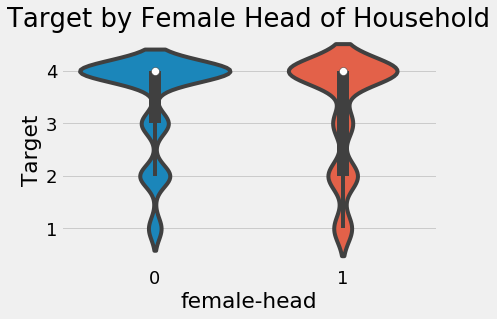

In [101]:
sns.violinplot(x = 'female-head', y = 'Target', data = final);
plt.title('Target by Female Head of Household');

We can also look at the difference in average education by whether or not the family has a female head of household.  
我們還可以通過家庭是否有女戶主的角度來研究平均教育水平的差異。

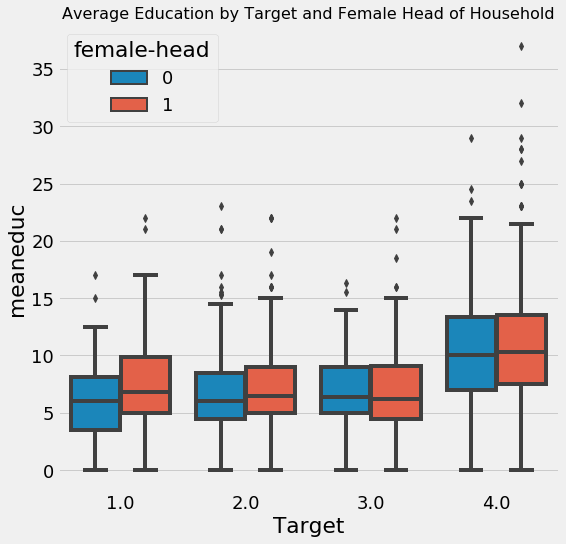

In [102]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final);
plt.title('Average Education by Target and Female Head of Household', size = 16);

It looks like at every value of the Target, households with female heads have higher levels of education. Yet, we saw that overall, households with female heads are more likely to have severe poverty.  
看起來，在實現目標的每個價值方面，女戶主的家庭受教育程度較高。 但是，我們看到，總體上，女戶主的家庭更容易陷入嚴重貧困。

In [103]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

,mean,count
female-head,,
0,8.968025,6384
1,9.237013,3903


Overall, the average education of households with female heads is slightly higher than those with male heads. I'm not too sure what to make of this, but it seems right to me.  
總體而言，女戶主家庭的平均教育水平略高於男戶主家庭。 我不太確定該怎麼做，但對我來說似乎是正確的。

Machine Learning Modeling  
Once feature engineering/construction is done, we can get started with the machine learning! All of our data (both training and testing) is aggregated for each household and so can be directly used in a model. To first show the process of modeling, we'll use the capable Random Forest Classifier in Scikit-Learn. This probably won't get us to the top of the leaderboard, but it will allow us to establish a baseline. Later we'll try several other models including the powerful Gradient Boosting Machine.  

To assess our model, we'll use 10-fold cross validation on the training data. This will essentially train and test the model 10 times using different splits of the training data. 10-fold cross validation is an effective method for estimating the performance of a model on the test set. We want to look at the average performance in cross validation as well as the standard deviation to see how much scores change between the folds. We use the F1 Macro measure to evaluate performance.  
機器學習建模  
一旦完成功能工程/構造，我們就可以開始機器學習！我們為每個家庭匯總了所有數據（包括培訓和測試），因此可以直接在模型中使用。首先顯示建模過程，我們將在Scikit-Learn中使用功能強大的隨機森林分類器。這可能無法將我們帶到排行榜的首位，但是它將使我們能夠建立基準。稍後，我們將嘗試其他幾種模型，包括功能強大的Gradient Boosting Machine。  

為了評估我們的模型，我們將對訓練數據進行10倍交叉驗證。這實際上將使用不同的訓練數據分割來訓練和測試模型10次。 10倍交叉驗證是一種評估測試集上模型性能的有效方法。我們希望查看交叉驗證中的平均表現以及標準偏差，以查看倍數之間的得分變化。我們使用F1宏度量來評估性能。 

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')


In [105]:
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

# Extract the training data
train_set = final[final['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])

# Submission base which is used for making submissions to the competition
submission_base = test[['Id', 'idhogar']].copy()

In [121]:
test = final[final['Target'].notnull()]
test

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,...,parentesco6-sum,parentesco7-min,parentesco7-max,parentesco8-min,parentesco8-max,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco10-min,parentesco10-max,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco12-min,parentesco12-max,parentesco12-sum,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-std,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-std,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-std,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel6-min,instlevel6-max,instlevel7-min,instlevel7-max,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-std,instlevel9-min,instlevel9-max,mobilephone-min,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_,age-min,age-max,age-sum,age-std,age-range_,inst-max,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std,tech-range_,female-head
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,190000.0,0.000000,10.0,0.0,10.00,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,NaN,0,0.0,0.0,10,10,10,NaN,0,43,43,43,NaN,0,3,NaN,0,0.232558,0.232558,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0,0
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,135000.0,8.000000,12.0,0.0,12.00,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,1,1,1,NaN,0,0,1,NaN,0,0.0,0.0,12,12,12,NaN,0,67,67,67,NaN,0,7,NaN,0,0.179104,0.179104,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0,0
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,False,0.0,8.000000,0.0,11.0,11.00,0.500000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0.0,0.0,11,11,11,NaN,0,92,92,92,NaN,0,4,NaN,0,0.119565,0.119565,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0,1
3,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,180000.0,1.000000,11.0,0.0,11.00,1.333333,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.500000,0,0,0,0.000000,0,1,1,0.500000,0,1,2,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,2,11,33,4.272002,9,8,38,100,14.899664,30,4,1.414214,3,0.250000,0.529412,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0,0
4,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,130000.0,1.000000,9.0,0.0,10.00,4.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0.500000,0,0,0,0.000000,0,1,1,0.500000,0,1,1,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,0,11,23,5.123475,11,7,30,76,11.690452,23,4,1.825742,4,0.000000,0.392857,0.965584,0

Because we are going to be comparing different models, we want to scale the features (limit the range of each column to between 0 and 1). For many ensemble models this is not necessary, but when we use models that depend on a distance metric, such as KNearest Neighbors or the Support Vector Machine, feature scaling is an absolute necessity. When comparing different models, it's always safest to scale the features. We also impute the missing values with the median of the feature.  
  
For imputing missing values and scaling the features in one step, we can make a pipeline. This will be fit on the training data and used to transform the training and testing data.  
因為我們將要比較不同的模型，所以我們想縮放特徵（將每列的範圍限制在0到1之間）。 對於許多集成模型而言，這不是必需的，但是當我們使用依賴於距離度量的模型（例如KNearest Neighbors或Support Vector Machine）時，絕對
必須進行特徵縮放。 比較不同模型時，縮放功能總是最安全的。 我們還用要素的中位數估算缺失值。  

為了一步一步地輸入缺失值和縮放要素，我們可以製作一條管道。 這將適合訓練數據，並用於轉換訓練和測試數據。  

In [117]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

TypeError: '<' not supported between instances of 'float' and 'str'